# Вариант №11.

# Предисловие

Ноутбук задуман так, чтобы вы ввели свой номер варианта, а затем запустили все ячейки. В результате вы получите ответы на вопросы ко всем задачам вашего варианта, останется только занести результаты в отчёт. Однако я настаиваю на том, чтобы минимально проверить входные данные.

Возможные корректировки:
- `plt.xlim` и `plt.ylim`, для корректного отображения графиков.
- Параметр $\pm 1000$ в [этой ячейке](#pm1000), если ваши данные очень близки к этим значениям и теоретически могут их принять.
- В разделах [6](#6) и [7](#7) количество вариантов в данных `X` и `Y` в зависимости от варианта может быть разное. Можете посмотреть на вариант `№2`, там другие данные и показывается, как от этого меняется таблица в отчёте.

Заинтересованный читатель в некоторых разделах может посмотреть пояснения к коду в необычных моментах, но в целом я старался сделать всё максимально понятным и простым.

Этот ноутбук - полный копипаст варианта  `№2`, чтобы продемонстрировать, как с ним работать. Написанное здесь может отличаться только в ячейках `markdown`, но никак не в ячейках кода.

Перед началом работы поменяйте путь к файлу с входными данными на свой [ячейке](#parse).

# Оглавление

- [0. Импорты и определения](#0)
- [1. Описательные статистики](#1)
    - [1.1. Выборочные характеристики](#11)
    - [1.2. Группировка и гистограммы частот](#12)
- [2. Интервальные оценки](#2)
    - [2.1. Доверительные интервалы для математического ожидания](#21)
    - [2.2. Доверительные интервалы для дисперсии](#22)
    - [2.3. Доверительные интервалы для разности математических ожиданий](#23)
    - [2.4. Доверительные интервалы для отношения дисперсий](#24)
- [3. Проверка статистических гипотез о математических ожиданиях и дисперсиях](#3)
    - [3.1. Проверка статистических гипотез о математических ожиданиях](#31)
    - [3.2. Проверка статистических гипотез о дисперсиях](#32)
    - [3.3. Проверка статистических гипотез о равенстве математических ожиданий](#33)
    - [3.4. Проверка статистических гипотез о равенстве дисперсий](#34)
- [4. Критерии согласия](#4)
    - [4.1. Критерий $\chi^2$](#41)
    - [4.2. Критерий Харке-Бера](#42)
- [5. Проверка однородности выборок](#5)
    - [5.1. Критерий знаков](#51)
    - [5.2. Критерий $\chi^2$](#52)
- [6. Таблицы сопряжённости](#6)
- [7. Дисперсионный анализ](#7)
- [8. Корреляционный анализ](#8)
    - [8.1. Рассчёт парных коэффициентов корреляции](#81)
    - [8.2. Рассчёт множественных коэффициентов корреляции](#82)
- [9. Регрессионный анализ](#9)
    - [9.1. Простейшая линейная регрессионная модель](#91)
    - [9.2. Линейная регрессионная модель общего вида](#92)
    - [9.3. Множественная линейная регрессионная модель](#93)
    - [9.4. Выводы](#94)

In [1]:
variant = 11

<a id="0"></a>

# Импорты и определения

### Библиотеки и их настройка

In [2]:
import os

mpl_dir = os.path.join(os.getcwd(), ".mplconfig")
os.makedirs(mpl_dir, exist_ok=True)
os.environ["MPLCONFIGDIR"] = mpl_dir

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math as m
import statsmodels.api as sm
from IPython.display import display, Markdown  # для вывода формул в консоль

In [3]:
def mprint(*strings):  # функция вывода маркдаун в консоль
    for s in strings:
        display(Markdown(s))


def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table


# можно выводить latex в надписях matplotlib
plt.rc("text", usetex=False)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

### Парсинг вариантов

In [4]:
%pwd

'/home/user/Desktop/Math'

<a id="parse"></a>

In [5]:
path_to_vars = "var_matstat_K5.xls"
path_to_data = "data_matstat_K5.xls"

In [6]:
# считываем столбики для варианта
datas = pd.read_excel(path_to_vars, index_col=0).loc[variant]

datas.head()

1.1         C12 C13 C14
1.2                 C12
2.1, 3.1            C12
2.2, 3.2            C12
2.3, 3.3          C7 C8
Name: 11, dtype: object

In [7]:
# создаём словарик: задание -> список столбцов
variant_dict = dict()
for tasks in datas.index:
    for task in tasks.split(", "):
        variant_dict[task] = (
            datas[tasks]
            .replace("А", "A")
            .replace("В", "B")
            .replace("С", "C")
            .split(" ")
        )

print(variant_dict)

{'1.1': ['C12', 'C13', 'C14'], '1.2': ['C12'], '2.1': ['C12'], '3.1': ['C12'], '2.2': ['C12'], '3.2': ['C12'], '2.3': ['C7', 'C8'], '3.3': ['C7', 'C8'], '2.4': ['C7', 'C8'], '3.4': ['C7', 'C8'], '4': ['C12'], '5': ['C7', 'C8'], '6': ['C3', 'C5'], '7': ['C3', 'C13'], '8.1': ['C7', 'C8'], '8.2': ['C12', 'C13', 'C14'], '9.1': ['C12', 'C14'], '9.2': ['C12', 'C14'], '9.3': ['C12', 'C4', 'C14']}


### Считываем информацию из excel

In [8]:
dfs = pd.read_excel(path_to_data, sheet_name=None)
dfs.keys()

dict_keys(['description', 'A - aaup', 'B - bodyfat', 'C - plasma', 'D - homedat'])

In [9]:
# создаём словарик: буква -> название листа в excel
sheet_dict = dict()
for value in list(dfs.keys())[1:]:
    key = value[0]
    sheet_dict[key] = value
print(sheet_dict)

{'A': 'A - aaup', 'B': 'B - bodyfat', 'C': 'C - plasma', 'D': 'D - homedat'}


In [10]:
# функция: задание -> необходимые данные
def data(task):
    X = []
    for data in variant_dict[task]:
        sheet = data[0]
        column = data
        df = dfs[sheet_dict[sheet]][column]
        X.append(df)
    return X

### Дополнительные функции

In [11]:
def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

<a id="1"></a>

# Раздел 1. Описательные статистики

<a id="11"></a>

## 1.1 Выборочные характеристики

### Условие

Анализируемый признак 1 – `C12` (Dietary retinol consumed (mcg per day))

Анализируемый признак 2 – `C13` (Plasma beta-carotene (ng/ml))

Анализируемый признак 3 – `C14` (Plasma Retinol (ng/ml))

### Определения

In [12]:
columns = data("1.1")
for i in columns:
    print(i.head())

0     890
1     451
2     660
3     864
4    1209
Name: C12, dtype: int64
0    200
1    124
2    328
3    153
4     92
Name: C13, dtype: int64
0    915
1    727
2    721
3    615
4    799
Name: C14, dtype: int64


### Привести формулы расчёта выборочных характеристик

| Выборочная характеристика                | Формула расчёта                                                                                                                                                                                                                                 |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Объём выборки                            | $n$                                                                                                                                                                                                                                             |
| Среднее                                  | $\overline x = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$                                                                                                                                                                                        |
| Выборочная дисперсия                     | $D_X^* = \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2$                                                                                                                                                                 |
| Выборочное среднеквадратичное отклонение | $\sigma_X^* = \sqrt{D_X^*} =\sqrt{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2}$                                                                                                                                       |
| Выборочный коэффициент асимметрии        | $\gamma_X^* = \dfrac{\mu_{3,X}^*}{\left(\sigma_X^*\right)^3} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^3}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^{\frac{3}{2}}}$ |
| Выборочный эксцесс                       |      $\varepsilon_X^* = \dfrac{\mu_{4,X}^*}{\left(\sigma_X^*\right)^4} - 3 = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^4}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^2} - 3$                                                                                                                                                                                                                                           |


### Рассчитать выборочные характеристики

`pd.skew()` возвращает несмещенный выборочный коэффициент асимметрии, поэтому лучше использовать `stats.skew(bias=True)`, чтобы его получить.

То же самое касается функции `kurtosis()`.

In [13]:
for i, X in enumerate(columns, start=1):
    mean_ = X.mean()
    D = X.var(ddof=0)
    d = X.std(ddof=0)
    g = stats.skew(X, bias=True)
    e = stats.kurtosis(X, bias=True)
    output = f"$\\mathbf{{X_{i}}}:$ \
        $\\overline x_{i} =$ {mean_:.2f}; \
        $D^*_{{X_{i}}} =$ {D:.2f}; \
        $\\sigma^*_{{X_{i}}} =$ {d:.2f}; \
        $\\gamma^*_{{X_{i}}} =$ {g:.2f}; \
        $\\varepsilon^*_{{X_{i}}} =$ {e:.2f} \
        "
    mprint(output)

$\mathbf{X_1}:$         $\overline x_1 =$ 832.71;         $D^*_{X_1} =$ 346159.14;         $\sigma^*_{X_1} =$ 588.35;         $\gamma^*_{X_1} =$ 4.45;         $\varepsilon^*_{X_1} =$ 37.45         

$\mathbf{X_2}:$         $\overline x_2 =$ 189.89;         $D^*_{X_2} =$ 33382.98;         $\sigma^*_{X_2} =$ 182.71;         $\gamma^*_{X_2} =$ 3.55;         $\varepsilon^*_{X_2} =$ 16.92         

$\mathbf{X_3}:$         $\overline x_3 =$ 602.79;         $D^*_{X_3} =$ 43498.79;         $\sigma^*_{X_3} =$ 208.56;         $\gamma^*_{X_3} =$ 1.31;         $\varepsilon^*_{X_3} =$ 3.94         

| Выборочная характеристика                | Признак 1 | Признак 2 | Признак 3  |
| ---------------------------------------- | --------- | --------- | ---------- |
| Среднее                                  | 832.71      | 189.89    | 602.79    |
| Выборочная дисперсия                     | 346159.14    | 33382.98  | 43498.79 |
| Выборочное среднеквадратичное отклонение | 588.35     | 182.71    | 208.56    |
| Выборочный коэффициент асимметрии        | 4.45     | 3.35      | 1.31       |
| Выборочный эксцесс                       | 37.45    | 16.92      | 3.94       |


<a id="12"></a>

## 1.2 Группировка и гистограммы частот

### Условие

Анализируемый признак – `C12` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

### Определения

In [14]:
X = data("1.2")[0]
X

0       890
1       451
2       660
3       864
4      1209
       ... 
310    1261
311     465
312     520
313     644
314     554
Name: C12, Length: 315, dtype: int64

In [15]:
print(n := len(X))

315


In [16]:
X = pd.DataFrame(X.values, columns=["value"])
X.head()

,value
0,890
1,451
2,660
3,864
4,1209


### Выбрать число групп

In [17]:
maximum = max(X["value"])
minimum = min(X["value"])
k = round(1 + 1.3 * m.log(n))
mprint(f"$\\mathbf{{X}}: \\max = {maximum}, \\min = {minimum}, n = {n}, k = {k}$")

$\mathbf{X}: \max = 6901, \min = 30, n = 315, k = 8$

In [18]:
X["group"] = pd.cut(X["value"], bins=k)
X.head()

,value,group
0,890,"(888.875, 1747.75]"
1,451,"(23.129, 888.875]"
2,660,"(23.129, 888.875]"
3,864,"(23.129, 888.875]"
4,1209,"(888.875, 1747.75]"


In [19]:
delta_min = np.min(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
delta_max = np.max(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
mprint(f"Ширина интервалов: от {delta_min:.2f} до {delta_max:.2f}")

Ширина интервалов: от 858.88 до 865.75

| Число групп | Обоснование выбора числа групп                 | Ширина интервалов |
| ----------- | ---------------------------------------------- | ----------------- |
| 8           | Формула Стерджесса: $k \approx 1 + 1,3 \ln{n}$ | от 858.88 до 865.75 |


### Построить таблицу частот

In [20]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="Номер интервала"))
groups["low edge"] = [interval.left for interval in X["group"].cat.categories]
groups["high edge"] = [interval.right for interval in X["group"].cat.categories]
groups["frequency"] = X["group"].value_counts().sort_index().values
groups["relative frequency"] = groups["frequency"] / n
groups["cumulative frequency"] = groups["frequency"].cumsum()
groups["cumulative relative frequency"] = groups["cumulative frequency"] / n
groups

,low edge,high edge,frequency,relative frequency,cumulative frequency,cumulative relative frequency
Номер интервала,,,,,,
1,23.129,888.875,204,0.647619,204,0.647619
2,888.875,1747.750,97,0.307937,301,0.955556
3,1747.750,2606.625,11,0.034921,312,0.990476
4,2606.625,3465.500,1,0.003175,313,0.993651
5,3465.500,4324.375,1,0.003175,314,0.996825
6,4324.375,5183.250,0,0.000000,314,0.996825
7,5183.250,6042.125,0,0.000000,314,0.996825
8,6042.125,6901.000,1,0.003175,315,1.000000


In [21]:
# Чтобы быстрее заполнить табличку
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | cumulative frequency | cumulative relative frequency |
|---|---|---|---|---|---|---|
| 1 | 23.13 | 888.88 | 204.0 | 0.65 | 204.0 | 0.65 |
| 2 | 888.88 | 1747.75 | 97.0 | 0.31 | 301.0 | 0.96 |
| 3 | 1747.75 | 2606.62 | 11.0 | 0.03 | 312.0 | 0.99 |
| 4 | 2606.62 | 3465.5 | 1.0 | 0.0 | 313.0 | 0.99 |
| 5 | 3465.5 | 4324.38 | 1.0 | 0.0 | 314.0 | 1.0 |
| 6 | 4324.38 | 5183.25 | 0.0 | 0.0 | 314.0 | 1.0 |
| 7 | 5183.25 | 6042.12 | 0.0 | 0.0 | 314.0 | 1.0 |
| 8 | 6042.12 | 6901.0 | 1.0 | 0.0 | 315.0 | 1.0 |



### Построить гистограммы частот и полигоны частот

In [22]:
bin_centers = (groups["low edge"] + groups["high edge"]) / 2
width = groups["high edge"] - groups["low edge"]

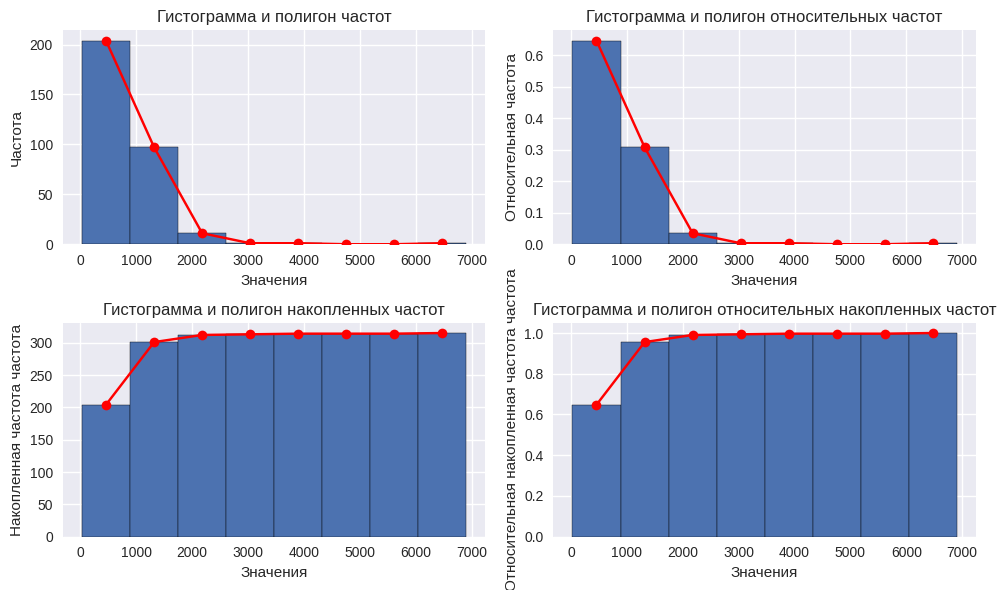

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].bar(
    bin_centers,
    groups["frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 0].plot(bin_centers, groups["frequency"], marker="o", color="r")
axes[0, 0].set_xlabel("Значения")
axes[0, 0].set_ylabel("Частота")
axes[0, 0].set_title("Гистограмма и полигон частот")

axes[0, 1].bar(
    bin_centers,
    groups["relative frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 1].plot(bin_centers, groups["relative frequency"], marker="o", color="r")
axes[0, 1].set_xlabel("Значения")
axes[0, 1].set_ylabel("Относительная частота")
axes[0, 1].set_title("Гистограмма и полигон относительных частот")

axes[1, 0].bar(
    bin_centers,
    groups["cumulative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 0].plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
axes[1, 0].set_xlabel("Значения")
axes[1, 0].set_ylabel("Накопленная частота частота")
axes[1, 0].set_title("Гистограмма и полигон накопленных частот")

axes[1, 1].bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 1].plot(
    bin_centers, groups["cumulative relative frequency"], marker="o", color="r"
)
axes[1, 1].set_xlabel("Значения")
axes[1, 1].set_ylabel("Относительная накопленная частота частота")
axes[1, 1].set_title("Гистограмма и полигон относительных накопленных частот")

plt.tight_layout()
plt.show()

### Построить эмпирическую фукнцию распределения

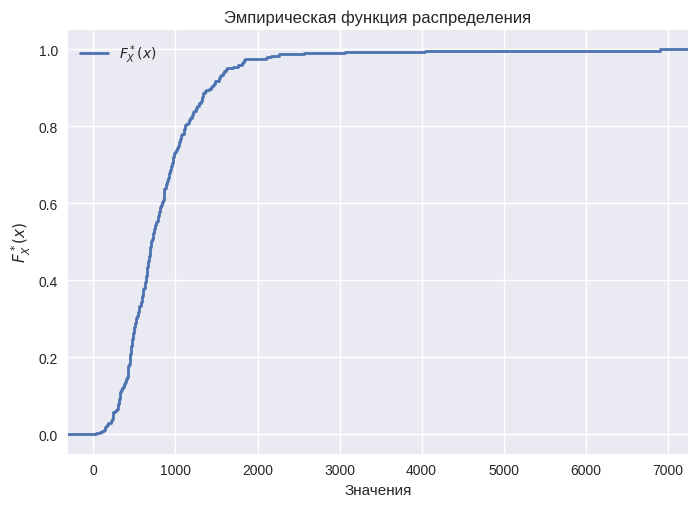

In [24]:
X_sorted = np.sort(X["value"])
X_sorted = np.concatenate(([-10000], X_sorted, [10000]))
F = np.arange(1, n + 1) / n
F = np.concatenate(([0], F, [1]))
plt.step(X_sorted, F, where="post", label=r"$F_X^*(x)$", linewidth=2)
xmin, xmax = X["value"].min(), X["value"].max()
pad = 0.05 * (xmax - xmin)
plt.xlim(xmin - pad, xmax + pad)
plt.xlabel("Значения")
plt.ylabel("$F^*_X(x)$")
plt.legend()
plt.title("Эмпирическая функция распределения")
plt.show()

<a id="2"></a>

# Раздел 2. Интервальные оценки

<a id="21"></a>

## 2.1 Доверительные интервалы для математического ожидания

### Условие

Анализируемый признак – `C12` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

Оцениваемый параметр – `m`

### Определения

In [25]:
X = data("2.1")[0]
X.head()

0     890
1     451
2     660
3     864
4    1209
Name: C12, dtype: int64

In [26]:
print(n := len(X))

315


### Привести формулы расчёта доверительных интервалов

Так как у нас есть только выборка, мы не можем знать параметров генеральной совокупности(в том числе $m$ и $\sigma$), поэтому будем рассчитывать доверительные интервалы, используя данный факт. 

В данном случае `стьюдентизованное среднее` выступает в качестве центральной статистики:

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\overline {\mathbf{X}} - \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |
| Верхняя граница                  | $\overline {\mathbf{X}} + \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |


### Рассчитать доверительные интервалы

In [27]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = stats.sem(X)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n - 1, loc=X.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,746.666993,767.386438,777.939140
Верхняя граница,918.761579,898.042133,887.489431


In [28]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 746.67 | 767.39 | 777.94 |
| Верхняя граница | 918.76 | 898.04 | 887.49 |



<a id="22"></a>

## 2.2 Доверительные интервалы для дисперсии

### Условие

Анализируемый признак – `C12` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

Оцениваемый параметр – $\sigma^2$

### Определения

In [29]:
X = data("2.2")[0]
X.head()

0     890
1     451
2     660
3     864
4    1209
Name: C12, dtype: int64

In [30]:
print(n := len(X))

315


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, \left(n-1\right)}}$ |
| Верхняя граница                  | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, \left(n-1\right)}}$ |


### Рассчитать доверительные интервалы

In [31]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    chi2_upper, chi2_lower = stats.chi2.interval(1 - alpha, df=n - 1)
    intervals[f"$\\alpha =$ {alpha}"] = [
        (n - 1) * X.var(ddof=1) / chi2_lower,
        (n - 1) * X.var(ddof=1) / chi2_upper,
    ]
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,285221.314064,298754.341272,306012.924642
Верхняя граница,430634.621743,408689.564851,398032.178257


In [32]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 285221.31 | 298754.34 | 306012.92 |
| Верхняя граница | 430634.62 | 408689.56 | 398032.18 |



<a id="23"></a>

## 2.3 Доверительные интервалы для разности мат. ожиданий

### Условие

Анализируемый признак 1 – `C7` (Grams of fat consumed per day)

Анализируемый признак 2 – `C8` (Grams of fiber consumed per day)

Объёмы выборок – $n_1 = n_2 = 315$

Оцениваемый параметр – $m_1 - m_2$

### Определения

In [33]:
X1, X2 = data("2.3")
X1.head(), X2.head()

(0    57.0
 1    50.1
 2    83.6
 3    97.5
 4    82.6
 Name: C7, dtype: float64,
 0     6.3
 1    15.8
 2    19.1
 3    26.5
 4    16.2
 Name: C8, dtype: float64)

In [34]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                                                                                                 |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) - t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| Верхняя граница                  | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) + t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| $S$                              | $\sqrt{\dfrac{(n_1 - 1)S_1^2 + (n_2-1) S_2^2}{n_1 + n_2 -2}}  $                                                                                                 |


### Рассчитать доверительные интервалы

In [35]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = m.sqrt(
    ((n1 - 1) * X1.var(ddof=1) + (n2 - 1) * X2.var(ddof=1))
    / (n1 + n2 - 2)
    * (1 / n1 + 1 / n2)
)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n1 + n2 - 2, loc=X1.mean() - X2.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,59.259324,60.455537,61.066184
Верхняя граница,69.230200,68.033987,67.423340


In [36]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 59.26 | 60.46 | 61.07 |
| Верхняя граница | 69.23 | 68.03 | 67.42 |



<a id="24"></a>

## 2.4. Доверительные интервалы для отношения дисперсий

### Условие

Анализируемый признак 1 – `C7` (Grams of fat consumed per day)

Анализируемый признак 2 – `C8` (Grams of fiber consumed per day)

Объёмы выборок – $n_1 = n_2 = 315$

Оцениваемый параметр – $\dfrac{\sigma_1^2}{\sigma_2^2}$


### Определения

In [37]:
X1, X2 = data("2.4")
X1.head(), X2.head()

(0    57.0
 1    50.1
 2    83.6
 3    97.5
 4    82.6
 Name: C7, dtype: float64,
 0     6.3
 1    15.8
 2    19.1
 3    26.5
 4    16.2
 Name: C8, dtype: float64)

In [38]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                       |
| -------------------------------- | --------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{S_1^2}{S_2^2} \cdot F_{\frac{\alpha}{2}, (n_1-1, n_2-1)}$     |
| Верхняя граница                  | $\dfrac{S_1^2}{S_2^2} \cdot F_{1 - \frac{\alpha}{2}, (n_1-1, n_2-1)}$ |

### Рассчитать доверительные интервалы

In [39]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.f.interval(
        1 - alpha, dfn=n1 - 1, dfd=n2 - 1, loc=0, scale=X1.var(ddof=1) / X2.var(ddof=1)
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,30.096800,32.274320,33.446863
Верхняя граница,53.912255,50.274843,48.512363


In [40]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 30.1 | 32.27 | 33.45 |
| Верхняя граница | 53.91 | 50.27 | 48.51 |



<a id="3"></a>

# Раздел 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

<a id="31"></a>

## 3.1 Проверка статистических гипотез о математических ожиданиях

### Условие

Анализируемый признак – `C12` (Dietary retinol consumed (mcg per day))

Объём выборки – $n$ = `315`

Статистическая гипотеза: $H_0:\ m = m_0; \quad H':\ m \neq m_0$

### Определения

In [41]:
X = data("3.1")[0]
X.head()

0     890
1     451
2     660
3     864
4    1209
Name: C12, dtype: int64

In [42]:
print(n := len(X))

315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                 |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $T = \dfrac{\overline X - m_0}{S/\sqrt{n}}$                               |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T \sim t_{n - 1}$                                                        |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2},\, n - 1}$                                   |
| Формула расчёта $p$-value                                                        | $p = 2\left(1 - F_{t_{n-1}}\left(|t_{\text{выб}}|\right)\right)$          |


### Выбрать произвольные значения $m_0$ и проверить статистические гипотезы

In [43]:
alpha = 0.1
m0_list = [0, 2, 4]

mprint(r"### T-test")
for m0 in m0_list:
    z, p_value = stats.ttest_1samp(X, m0)
    mprint(
        r"---",
        f"$H_0: m = m_0 = {m0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### T-test

---

$H_0: m = m_0 = 0$

$z_{выб} =$ 25.08

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: m = m_0 = 2$

$z_{выб} =$ 25.02

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: m = m_0 = 4$

$z_{выб} =$ 24.96

$p =$ 0.00

$H_0$ отклоняется

| $m_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод      |
| ----- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------- |
| 0     | 0.1                | 25.08                                         | 0.00      | $H_0$ отклоняется      | $m \neq 0$ |
| 2     | 0.1                | 25.02                                         | 0.00      | $H_0$ отклоняется      | $m \neq 2$ |
| 4     | 0.1                | 24.96                                        | 0.00      | $H_0$ отклоняется      | $m \neq 4$    |


<a id="32"></a>

## 3.2 Проверка статистических гипотез о дисперсиях

### Условие

Анализируемый признак – `C12` (Dietary retinol consumed (mcg per day))

Объём выборки – $n$ = `315`

Статистическая гипотеза: $H_0:\ \sigma = \sigma_0; \quad H':\ \sigma \neq \sigma_0$

### Определения

In [44]:
X = data("3.2")[0]
X.head()

0     890
1     451
2     660
3     864
4    1209
Name: C12, dtype: int64

In [45]:
print(n := len(X))

315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $m$, значит используем $\chi^2-test$.

|                                                                                  | Выражение                                                                 |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $T = \dfrac{(n - 1)S^2}{\sigma_0^2}$                                      |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T \sim \chi^2_{n - 1}$                                                   |
| Формулы расчёта критических точек                                                | $\chi^2_{\frac{\alpha}{2},\, n - 1},\ \chi^2_{1 - \frac{\alpha}{2},\, n - 1}$ |
| Критическая область (двусторонняя)                                               | $T < \chi^2_{\frac{\alpha}{2},\, n - 1}\ \ \text{или}\ \ T > \chi^2_{1 - \frac{\alpha}{2},\, n - 1}$ |
| Формула расчёта $p$-value                                                        | $p = 2\min\left(F_{\chi^2_{n-1}}\!\left(t_{\text{выб}}\right),\ 1 - F_{\chi^2_{n-1}}\!\left(t_{\text{выб}}\right)\right)$ |


### Выбрать произвольные значения $\sigma_0$ и проверить статистические гипотезы

In [46]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, df=n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [47]:
alpha = 0.1
std0_list = [500, 600, 700] 

mprint(r"### $\chi^2$-test")
for std0 in std0_list:
    z, p_value = chisquare(X, std0)
    mprint(
        r"---",
        f"$H_0: \\sigma = \\sigma_0 = {std0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.3f}",
        verdict(alpha, p_value),
    )


### $\chi^2$-test

---

$H_0: \sigma = \sigma_0 = 500$

$z_{выб} =$ 436.16

$p =$ 0.000

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 600$

$z_{выб} =$ 302.89

$p =$ 0.673

$H_0$ принимается

---

$H_0: \sigma = \sigma_0 = 700$

$z_{выб} =$ 222.53

$p =$ 0.000

$H_0$ отклоняется

| $\sigma_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод            |
| ---------- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------------- |
| 10         | 0.1                | 436.16                                      | 0.00      | $H_0$ отклоняется      | $\sigma \neq 10$ |
| 12.5         | 0.1                | 302.89                                       |   0.673    | $H_0$ принимается      | $\sigma = 12.5$ |
| 15         | 0.1                | 222.53                                       |  0.00     |   $H_0$ отклоняется    |  $\sigma \neq 15$   |

<a id="33"></a>

## 3.3 Проверка статистических гипотез о равенстве математических ожиданий

### Условие

Анализируемый признак 1 – `C7` (Grams of fat consumed per day)

Анализируемый признак 2 – `C8` (Grams of fiber consumed per day)

Объёмы выборок – $n_1 = n_2 = 315$

Статистическая гипотеза: $H_0:\ m_1 = m_2; \quad H':\ m_1 \neq m_2$

### Определения

In [48]:
X1, X2 = data("3.3")
X1.head(), X2.head()

(0    57.0
 1    50.1
 2    83.6
 3    97.5
 4    82.6
 Name: C7, dtype: float64,
 0     6.3
 1    15.8
 2    19.1
 3    26.5
 4    16.2
 Name: C8, dtype: float64)

In [49]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                                                                                                  |
| -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline{X_1} - \overline{X_2}}{S\sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}}}$, где $S^2 = \dfrac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n_1 + n_2 - 2)$                                                                                                                                         |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n_1 + n_2 - 2}$                                                                                                              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                   |


### Проверить статистические гипотезы

In [50]:
alphas = [0.01, 0.05, 0.1]
z, p_value = stats.ttest_ind(X1, X2)
mprint(
    r"### two-sample T-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)
for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### two-sample T-test

$H_0: m_1 = m_2$

$z_{выб} =$ 33.29

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод          |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | -------------- |
| 0.01               | 33.29                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |
| 0.05               | 33.29                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |
| 0.1                | 33.29                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |


<a id="34"></a>

## 3.4 Проверка статистических гипотез о равенстве дисперсий

### Условие

Анализируемый признак 1 – `C7` (Grams of fat consumed per day)

Анализируемый признак 2 – `C8` (Grams of fiber consumed per day)

Объёмы выборок – $n_1 = n_2 = 315$

Статистическая гипотеза: $H_0:\ \sigma_1 = \sigma_2; \quad H':\ \sigma_1 \neq \sigma_2$

### Определения

In [51]:
X1, X2 = data("3.4")
X1.head(), X2.head()

(0    57.0
 1    50.1
 2    83.6
 3    97.5
 4    82.6
 Name: C7, dtype: float64,
 0     6.3
 1    15.8
 2    19.1
 3    26.5
 4    16.2
 Name: C8, dtype: float64)

In [52]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                 |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{S_1^2}{S_2^2}$                                                                |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(n_1 - 1,\ n_2 - 1)$                                                                    |
| Формулы расчёта критических точек                                                | $F_{\frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1},\ F_{1 - \frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                  |

### Проверить статистические гипотезы

In [53]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [54]:
alphas = [0.01, 0.05, 0.1]
z, p_value = Ftest(X1, X2)
mprint(
    r"### F-test",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### F-test

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 40.28

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 40.28                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.05               | 40.28                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.1                | 40.28                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |

<a id="4"></a>

# Раздел 4. Критерии согласия

## Условие

Анализируемый признак – `С12` (Dietary retinol consumed (mcg per day))

Объём выборки – $n$ = `315`

## Определения

In [55]:
X = data("4")[0]
X.head()

0     890
1     451
2     660
3     864
4    1209
Name: C12, dtype: int64

In [56]:
print(n := len(X))

315


<a id="41"></a>

## 4.1 Критерий $\chi^2$ 

Теоретическое распределение - нормальное.

Статистическая гипотеза - $H_0:\ X \sim N; \quad H':\ X \nsim N$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                         | Пояснение использованных обозначений                                                                                                                                                                                                                                                                                                                                               |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \sum\limits_{i=1}^{k} \dfrac{\left(n_i - n \cdot p_i\right)^2}{n \cdot p_i}$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $p_i$ - вероятность попадания случайной величины $\mathbf X$ в интервал $\Delta_i$ в условиях $H_0$, то есть, если $\Delta_i = (a_{i-1}, a_{i}]$, то $$p_i = \int\limits_{a_{i-1}}^{a_{i}}g(x)dx = G(a_{i}) - G(a_{i-1}).$$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - r - 1)$                                                               | $r$ - количество оцениваемых параметров у предполагаемого распределения $G$.                                                                                                                                                                                                                                                                                                       |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - r - 1}$                                                 | Малые значения $Z$ нам также подходят, поэтому критическая область выбирается правосторонней                                                                                                                                                                                                                                                                                       |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                |                                                                                                                                                                                                                                                                                                                                                                                    |

### Выбрать число групп

Область всевозможных значений предполагаемого распределения делят на $k$ групп (интервалов). Наше предполагаемое распределение — нормальное, поэтому делим всю числовую прямую на $k$ интервалов.

Обычно число групп выбирают по формуле Стерджесса: $k \approx 1 + 1.3 \ln n$.

Однако критерий $\chi^2$ чувствителен к интервалам, для которых ожидаемые частоты $n \cdot p_i$ меньше 5. Поэтому при группировке нужно учитывать это условие.

Поступаем следующим образом:
1. Разбивал выборку на $k$ интервалов библиотечными функциями.
2. Левую границу первого интервала полагал равной $-\infty$, а правую границу последнего — $+\infty$.
3. Рассчитывал ожидаемые частоты $n \cdot p_i$ и при необходимости объединял соседние интервалы, чтобы выполнялось условие $n \cdot p_i \ge 5$.
4. При необходимости дополнительно делил интервалы с большим значением $n \cdot p_i$.


In [57]:
k = round(1 + 1.3 * m.log(n))
k

8

In [58]:
frequences, bin_edges = np.histogram(X, bins=k)
bin_edges

array([  30.   ,  888.875, 1747.75 , 2606.625, 3465.5  , 4324.375,
       5183.25 , 6042.125, 6901.   ])

<a id="pm1000"></a>

Устремляю левый конец первого интервала в $-\infty$ и правый конец последнего интервала в $+\infty$. 

In [59]:
bin_edges[0] = X.min() - 1
bin_edges[-1] = X.max() + 1
bin_edges

array([  29.   ,  888.875, 1747.75 , 2606.625, 3465.5  , 4324.375,
       5183.25 , 6042.125, 6902.   ])

Для каждого интервала $[a_{i-1}, a_i]$ найдём $p_i = G(a_i) - G(a_{i-1})$ - вероятность попадания случайной величины $\mathbf X$ в интервал $[a_{i-1}, a_i]$ в условиях $H_0$.

Напомним, что в данном случае теоретическое распределение - нормальное. Поэтому и будем использовать `stats.norm.cdf()`.

In [60]:
probabilities = np.diff(stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf(bin_edges))
probabilities

array([4.51658652e-01, 4.01799327e-01, 5.89328150e-02, 1.30118617e-03,
       3.95109532e-06, 1.55942392e-09, 7.76045894e-14, 0.00000000e+00])

Мы нашли вероятности попасть в каждый интервал. Теперь найдём ожидаемые частоты $n \cdot p_i$.

In [61]:
def get_expected_frequencies(bin_edges, n, cdf=stats.norm.cdf):
    probabilities = np.diff(cdf(bin_edges))
    return n * probabilities

In [62]:
get_expected_frequencies(
    bin_edges, n, cdf=stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf
)

array([1.42272475e+02, 1.26566788e+02, 1.85638367e+01, 4.09873642e-01,
       1.24459503e-03, 4.91218536e-07, 2.44454457e-11, 0.00000000e+00])

Как видим, для третьего и всех последующих интервалов ожидаемые частоты меньше 5. Условие $n \cdot p_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [63]:
def merge_interval(bin_edges, expected_frequencies, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        expected_frequencies[i + 1] += expected_frequencies[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        expected_frequencies[i - 1] += expected_frequencies[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if expected_frequencies[i - 1] < expected_frequencies[i + 1]:
            bin_edges.pop(i)
            expected_frequencies[i - 1] += expected_frequencies[i]
        else:
            bin_edges.pop(i + 1)
            expected_frequencies[i + 1] += expected_frequencies[i]
    expected_frequencies.pop(i)

In [64]:
def adjust_intervals(bin_edges, n, distrib=stats.norm, k=None):
    """
    Функция для корректировки интервалов и вероятностей

    Параметры:
    bin_edges: Границы интервалов
    n: uint - объем выборки
    distrib: распределение, которое мы хотим использовать для подсчета вероятностей
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой ожидаемой частотой с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой ожидаемой частотой, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых ожидаемая частота большая, таким образом получая на выходе k >= len(intervals).
    """
    cdf = distrib.cdf
    ppf = distrib.ppf
    expected_frequencies = get_expected_frequencies(bin_edges, n, cdf=cdf).tolist()
    if type(bin_edges) == np.ndarray:
        bin_edges = bin_edges.tolist()

    # Слияние интервалов с ожидаемой частотой <= 5
    i = 0
    while True:
        if expected_frequencies[i] <= 5:
            merge_interval(bin_edges, expected_frequencies, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной ожидаемой частотой.
    if k is not None:
        while len(bin_edges) < k + 1:
            max_expected_frequency = max(expected_frequencies)

            # если максимальная ожидаемая частота меньше 10, то нельзя подразбивать интервалы
            if max_expected_frequency < 10:
                break

            max_index = expected_frequencies.index(max_expected_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что ожидаемая частота в интервалах (a, c) и (c, b) как минимум 5
            c = (ppf(cdf(a) + 5 / n) + ppf(cdf(b) - 5 / n)) / 2

            e_left, e_right = get_expected_frequencies([a, c, b], n, cdf=cdf)

            bin_edges.insert(max_index + 1, c)

            expected_frequencies[max_index] = e_left
            expected_frequencies.insert(max_index + 1, e_right)

    return np.array(bin_edges), np.array(expected_frequencies)

In [65]:
bin_edges, expected_frequencies = adjust_intervals(
    bin_edges, n, distrib=stats.norm(loc=X.mean(), scale=X.std(ddof=1)), k=8
)
bin_edges, expected_frequencies

(array([  29.        ,  265.60393797,  475.06160734,  684.10938573,
         888.875     , 1087.84922916, 1294.44742497, 1747.75      ,
        6902.        ]),
 array([25.71326537, 32.76558947, 40.47783378, 43.31578681, 40.79663447,
        36.4990253 , 49.27112824, 18.97495547]))

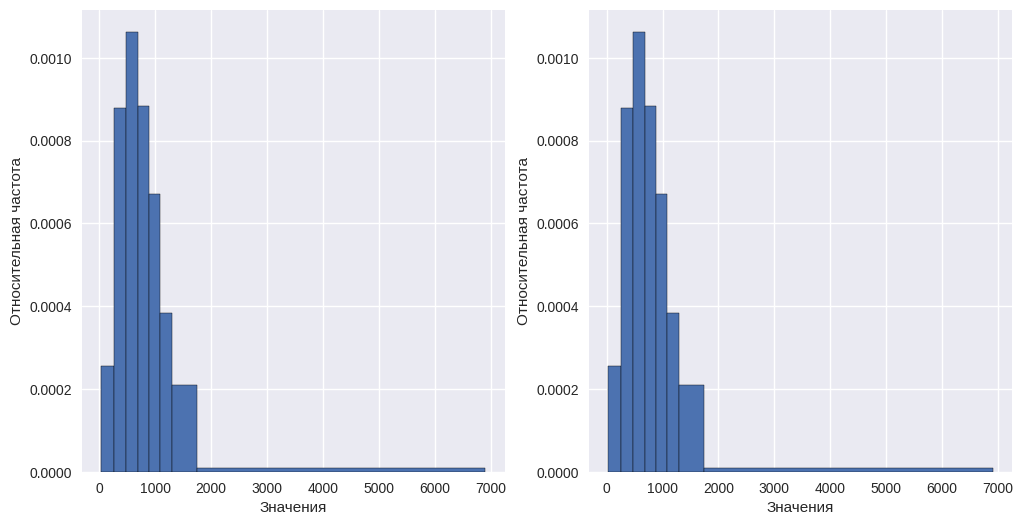

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[0].set_xlabel("Значения")
axes[0].set_ylabel("Относительная частота")

axes[1].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[1].set_xlabel("Значения")
axes[1].set_ylabel("Относительная частота")
xmin, xmax = X.min(), X.max()
pad = 0.05 * (xmax - xmin)
for ax in axes:
    ax.set_xlim(xmin - pad, xmax + pad)



plt.show()

Теперь мы чётко разбили всю числовую прямую на интервалы, для которых ожидаемые частоты $n \cdot p_i \gtrsim 5$.

In [67]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 198.97 до 5154.25

| Число интервалов | Обоснование выбора числа интервалов                                                                               | Ширина интервалов   |
| ---------------- | ----------------------------------------------------------------------------------------------------------------- | ------------------- |
| 8                | $k \approx 1 + 1,3 \ln{n}$ - формула Стерджесса $\\n \cdot p_i \gtrsim 5$ - поправка на чувствительность критерия | от 198.97 до 5154.25 |



### Построить таблицу частот

In [68]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency"] = groups.apply(
    lambda row: ((X >= row["low edge"]) & (X < row["high edge"])).sum(), axis=1
)
groups["relative frequency"] = groups["frequency"] / n
groups["expected probability"] = expected_frequencies / n
groups

,low edge,high edge,frequency,relative frequency,expected probability
Номер интервала,,,,,
1,29.000000,265.603938,19,0.060317,0.081629
2,265.603938,475.061607,58,0.184127,0.104018
3,475.061607,684.109386,70,0.222222,0.128501
4,684.109386,888.875000,57,0.180952,0.137510
5,888.875000,1087.849229,42,0.133333,0.129513
6,1087.849229,1294.447425,25,0.079365,0.115870
7,1294.447425,1747.750000,30,0.095238,0.156416
8,1747.750000,6902.000000,14,0.044444,0.060238


In [69]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | expected probability |
|---|---|---|---|---|---|
| 1 | 29.0 | 265.6 | 19.0 | 0.06 | 0.08 |
| 2 | 265.6 | 475.06 | 58.0 | 0.18 | 0.1 |
| 3 | 475.06 | 684.11 | 70.0 | 0.22 | 0.13 |
| 4 | 684.11 | 888.88 | 57.0 | 0.18 | 0.14 |
| 5 | 888.88 | 1087.85 | 42.0 | 0.13 | 0.13 |
| 6 | 1087.85 | 1294.45 | 25.0 | 0.08 | 0.12 |
| 7 | 1294.45 | 1747.75 | 30.0 | 0.1 | 0.16 |
| 8 | 1747.75 | 6902.0 | 14.0 | 0.04 | 0.06 |



### Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике

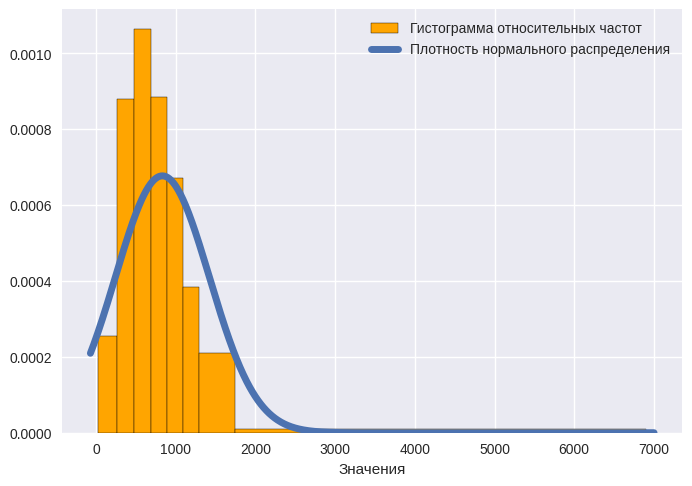

In [70]:
grid = np.linspace(X.min() - 100, X.max() + 100, 1000)
plt.hist(
    X,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Гистограмма относительных частот",
    color="orange",
)

plt.plot(
    grid,
    stats.norm.pdf(grid, loc=X.mean(), scale=X.std(ddof=1)),
    label="Плотность нормального распределения",
    lw=5,
)
plt.legend()
xmin, xmax = X.min(), X.max()
pad = 0.05 * (xmax - xmin)
for ax in axes:
    ax.set_xlim(xmin - pad, xmax + pad)

plt.xlabel("Значения")
plt.show()

### Проверить статистические гипотезы

In [71]:
alphas = [0.01, 0.05, 0.1]

# observed
obs = groups["frequency"].to_numpy()
n = obs.sum()

# границы интервалов (используй те же, по которым строился groups)
edges = np.asarray(bin_edges, dtype=float)   # bin_edges у тебя уже есть выше в ноутбуке

# параметры N(mu, sigma) — возьми те же оценки, что выше по заданию
mu_hat = X.mean()
sigma_hat = X.std(ddof=1)

# expected frequencies через CDF (ВАЖНО)
p = stats.norm.cdf(edges[1:], loc=mu_hat, scale=sigma_hat) - stats.norm.cdf(edges[:-1], loc=mu_hat, scale=sigma_hat)
expected_frequencies = n * p

# выровнять сумму, чтобы совпадала с observed
expected_frequencies *= (n / expected_frequencies.sum())

# χ² test
z, p_value = stats.chisquare(obs, expected_frequencies, ddof=2)

mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

z, p_value = stats.chisquare(groups["frequency"], expected_frequencies, ddof=2)
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 52.06

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

### $\chi^2$-test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 52.06

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

<a id="42"></a>

## 4.2 Критерий Харке-Бера

Статистическая гипотеза: $H_0:\ X \sim N; \quad H':\ X \nsim N$

### Теоретическая справка

Критерий Харке-Бера (Jarque-Bera) - это критерий проверки гипотезы о нормальности выборки:

$H_0:\ X \sim N; \quad H':\ X \nsim N$

Для проверки нормальности распределения нулевая гипотеза разбивается на две части:

$$H_0^{(1)}: \gamma_X = 0; \quad H'^{(1)}: \gamma_X \neq 0$$
$$H_0^{(2)}: \varepsilon_X = 0; \quad H'^{(2)}: \varepsilon_X \neq 0, где$$

Для этих гипотез используются следующие статистики:

$Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\ \ \ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$, при этом $Z_1 \mid_{H_0^{(1)}} \sim N(0, 1);\ \ \ Z_2 \mid_{H_0^{(2)}} \sim N(0, 1)$.

Если хоть одна $H_0^{(1)}$ или $H_0^{(2)}$ отклоняется, то исходная гипотеза $H_0$ отклоняется.

Для проверки основной гипотезы строится общая статистика: $Z = Z_1^2 + Z_2^2$, при этом $Z \mid_{H_0} \sim \chi^2(2)$. Критическая область - правосторонняя.

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = Z^2_1 + Z^2_2$, где $\\Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\\ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$ | $\gamma^*_X$ - выборочный коэффициент асимметрии, $\\ \varepsilon^*_X$ - выборочный эксцесс, $\\ n$ - объём выборки. |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(2)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ 2}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Проверить статистические гипотезы

In [72]:
z, p_value = stats.jarque_bera(X)
mprint(
    r"### Jarque-Bera test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Jarque-Bera test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 19445.83

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод       |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ----------- |
| 0.01               | 19445.83                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.05               | 19445.83                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.1                | 19445.83                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |

## Вывод (в терминах предметной области):

В результате проведённого в п.4 статистического анализа обнаружено, что оба критерия согласия отвергают гипотезу о нормальности распределения величины `C12`, поэтому можно сделать вывод, что `C12` не имеет нормального распределения.

<a id="5"></a>

# Раздел 5. Проверка однородности выборок

## Условие

Анализируемый признак 1 – `C7` (Grams of fat consumed per day)

Анализируемый признак 2 – `C8` (Grams of fiber consumed per day)

Объёмы выборок – $n_1 = n_2 = 315$

## Определения

In [73]:
X, Y = data("5")

X.head(), Y.head()

(0    57.0
 1    50.1
 2    83.6
 3    97.5
 4    82.6
 Name: C7, dtype: float64,
 0     6.3
 1    15.8
 2    19.1
 3    26.5
 4    16.2
 Name: C8, dtype: float64)

In [74]:
print(n1 := len(X), n2 := len(Y))

315 315


<a id="51"></a>

## 5.1 Критерий знаков

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x); \quad H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{K_+ - \dfrac{n}{2}}{\sqrt{\dfrac{n}{4}}}$ | $K_+$ - количество знаков `+` в выборке $z_1, \dots, z_n = x_1 - y_1, \dots, x_n - y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $N(0, 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\pm u_{1 - \frac{\alpha}{2}}$                                                                                                         | Двусторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                                |                                                                                                                                         |


### Проверить статистические гипотезы

In [75]:
def sign_test(X, Y):
    if len(X) != len(Y):
        raise ValueError("Длины выборок должны совпадать")
    n = len(X)
    k = sum(X > Y)
    z = (k - n / 2) / m.sqrt(n / 4)
    p_value = 2 * min(stats.norm.cdf(z), 1 - stats.norm.cdf(z))
    return z, p_value

In [76]:
alphas = [0.01, 0.05, 0.1]

z, p_value = sign_test(X, Y)
mprint(
    r"### Sign test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Sign test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 17.75

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 17.75                                        | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | 17.75                                        | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | 17.75                                        | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

<a id="52"></a>

## 5.2 Критерий $\chi^2$

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x); \quad H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = nm\sum\limits_{i=1}^{k}\dfrac{1}{n_i+m_i}\left(\dfrac{n_i}{n} + \dfrac{m_i}{m}\right)$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $m_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $n$ - объём выборки $x_1, \dots, x_n$ $\\$ $m$ - объём выборки $y_1, \dots, y_m$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - 1}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Выбрать число групп

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{\max(n, m)}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых $n_i + m_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Рассмотрим данный пример:

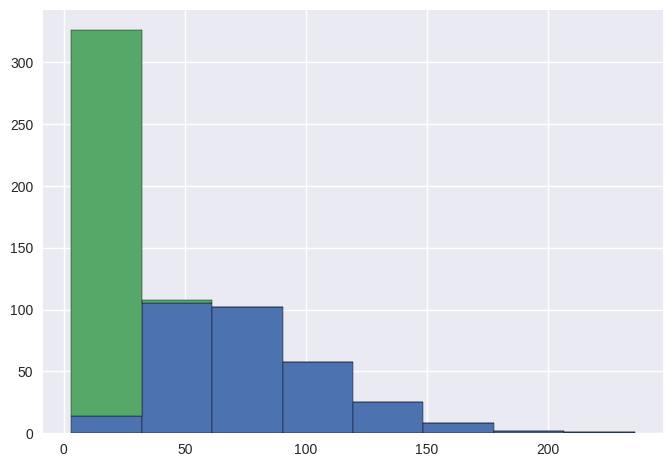

In [77]:
k = round(1 + 1.3 * m.log(max(n1, n2)))

frequences, bin_edges, _ = plt.hist((X, Y), bins=k, edgecolor="black", stacked=True)
plt.show()

Посмотрим на значения $n_i + m_i$ для каждого интервала.

In [78]:
frequences[1]

array([326., 108., 102.,  58.,  25.,   8.,   2.,   1.])

Как видим, для последних двух интервалов $n_i + m_i < 5$. Условие $n_i + m_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [79]:
def merge_interval(bin_edges, frequences1, frequences2, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        frequences1[i + 1] += frequences1[i]
        frequences2[i + 1] += frequences2[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        frequences1[i - 1] += frequences1[i]
        frequences2[i - 1] += frequences2[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if (
            frequences1[i - 1] + frequences2[i - 1]
            < frequences1[i + 1] + frequences2[i + 1]
        ):
            bin_edges.pop(i)
            frequences1[i - 1] += frequences1[i]
            frequences2[i - 1] += frequences2[i]
        else:
            bin_edges.pop(i + 1)
            frequences1[i + 1] += frequences1[i]
            frequences2[i + 1] += frequences2[i]
    frequences1.pop(i)
    frequences2.pop(i)

In [80]:
def adjust_intervals(bin_edges, X1, X2, k=None):
    """
    Функция для корректировки интервалов и частот попадания в них
    bin_edges: Границы интервалов
    X1: Первая выборка
    X2: Вторая выборка
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой частотой попадания с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой частотой попадания, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых частота попадания большая, таким образом получая на выходе k >= len(intervals).
    """
    frequences1, _ = np.histogram(X1, bins=bin_edges)
    frequences2, _ = np.histogram(X2, bins=bin_edges)
    frequences1 = frequences1.tolist()
    frequences2 = frequences2.tolist()

    # Слияние интервалов с малой частотой попадания
    i = 0
    while True:
        if frequences1[i] + frequences2[i] < 5:
            merge_interval(bin_edges, frequences1, frequences2, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной частотой попадания
    if k is not None:
        while len(bin_edges) < k + 1:
            total_frequency = [x + y for x, y in zip(frequences1, frequences2)]
            max_frequency = max(total_frequency)

            # если максимальная частота меньше 5, то нельзя подразбивать интервалы
            if max_frequency < 10:
                break

            max_index = total_frequency.index(max_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что частота попадания в интервалах (a, c) и (c, b) как минимум 5
            c = (a + b) / 2

            frequences1[max_index] = ((X1 >= a) & (X1 < c)).sum()
            frequences2[max_index] = ((X2 >= a) & (X2 < c)).sum()
            frequences1.insert(max_index + 1, ((X1 >= c) & (X1 < b)).sum())
            frequences2.insert(max_index + 1, ((X2 >= c) & (X2 < b)).sum())
            bin_edges.insert(max_index + 1, c)

    return bin_edges, frequences1, frequences2

In [81]:
bin_edges, frequences1, frequences2 = adjust_intervals(bin_edges.tolist(), X, Y, k=k)
np.array(frequences1) + np.array(frequences2)

array([109, 159,  58, 108, 102,  58,  25,  11])

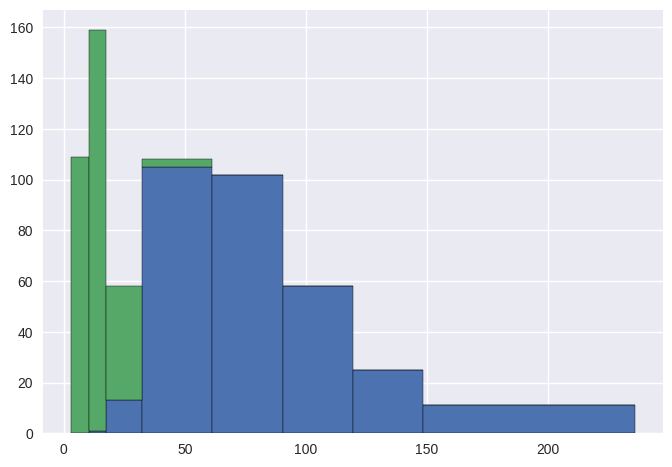

In [82]:
frequences, bin_edges, _ = plt.hist(
    (X, Y), bins=bin_edges, edgecolor="black", stacked=True
)
plt.show()

In [83]:
frequences[1]

array([109., 159.,  58., 108., 102.,  58.,  25.,  11.])

Теперь группировка выборок проведена правильно.

In [84]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 7.28 до 87.30

| Число интервалов | Обоснование выбора числа интервалов                                                                                     | Ширина интервалов    |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------- | -------------------- |
| 8                | $k \approx 1 + 1.3 \ln \max(n, m)$ - формула Стерджесса $\\n_i + m_i \gtrsim 5$ - поправка на чувствительность критерия | от 7.28 до 87.30 |



### Построить таблицу частот

In [85]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency1"] = frequences[0]
groups["frequency2"] = frequences[1] - frequences[0]
groups["relative frequency1"] = groups["frequency1"] / n1
groups["relative frequency2"] = groups["frequency2"] / n2

groups

,low edge,high edge,frequency1,frequency2,relative frequency1,relative frequency2
Номер интервала,,,,,,
1,3.100,10.375,0.0,109.0,0.000000,0.346032
2,10.375,17.650,1.0,158.0,0.003175,0.501587
3,17.650,32.200,13.0,45.0,0.041270,0.142857
4,32.200,61.300,105.0,3.0,0.333333,0.009524
5,61.300,90.400,102.0,0.0,0.323810,0.000000
6,90.400,119.500,58.0,0.0,0.184127,0.000000
7,119.500,148.600,25.0,0.0,0.079365,0.000000
8,148.600,235.900,11.0,0.0,0.034921,0.000000


In [86]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency1 | frequency2 | relative frequency1 | relative frequency2 |
|---|---|---|---|---|---|---|
| 1 | 3.1 | 10.38 | 0.0 | 109.0 | 0.0 | 0.35 |
| 2 | 10.38 | 17.65 | 1.0 | 158.0 | 0.0 | 0.5 |
| 3 | 17.65 | 32.2 | 13.0 | 45.0 | 0.04 | 0.14 |
| 4 | 32.2 | 61.3 | 105.0 | 3.0 | 0.33 | 0.01 |
| 5 | 61.3 | 90.4 | 102.0 | 0.0 | 0.32 | 0.0 |
| 6 | 90.4 | 119.5 | 58.0 | 0.0 | 0.18 | 0.0 |
| 7 | 119.5 | 148.6 | 25.0 | 0.0 | 0.08 | 0.0 |
| 8 | 148.6 | 235.9 | 11.0 | 0.0 | 0.03 | 0.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота признака 1 | Частота признака 2 | Относительная частота признака 1 | Относительная частота признака 2 |
| --------------- | -------------- | --------------- | ------------------ | ------------------ | -------------------------------- | -------------------------------- |
| 1               | 30.0           | 630.75          | 24.0               | 122.0              | 0.08                             | 0.39                             |
| 2               | 630.75         | 931.12          | 29.0               | 93.0               | 0.09                             | 0.3                              |
| 3               | 931.12         | 1231.5          | 41.0               | 50.0               | 0.13                             | 0.16                             |
| 4               | 1231.5         | 2433.0          | 118.0              | 46.0               | 0.37                             | 0.15                             |
| 5               | 2433.0         | 3634.5          | 63.0               | 2.0                | 0.2                              | 0.01                             |
| 6               | 3634.5         | 4836.0          | 20.0               | 1.0                | 0.06                             | 0.0                              |
| 7               | 4836.0         | 6037.5          | 11.0               | 0.0                | 0.03                             | 0.0                              |
| 8               | 6037.5         | 9642.0          | 9.0                | 1.0                | 0.03                             | 0.0                              |

### Построить гистограммы относительных частот на одном графике

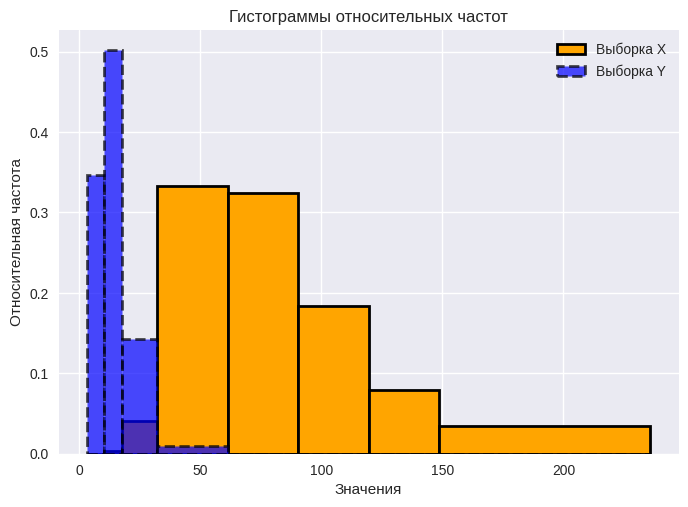

In [87]:
plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency1"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка X",
    color="orange",
    lw=2,
)

plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency2"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка Y",
    alpha=0.7,
    linestyle="--",
    lw=2,
    color="blue",
)
plt.legend()
plt.title("Гистограммы относительных частот")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

### Проверить статистические гипотезы

In [88]:
def chi2_2samp(frequencies1, frequencies2):
    if len(frequencies1) != len(frequencies2):
        raise ValueError("Длины выборок должны совпадать")
    k = len(frequencies1)
    n = sum(frequencies1)
    m = sum(frequencies2)
    z = (
        n
        * m
        * sum(
            (frequencies1 / n - frequencies2 / m) ** 2 / (frequencies1 + frequencies2)
        )
    )
    p_value = stats.chi2.sf(z, df=k - 1)
    return z, p_value

In [89]:
alphas = [0.01, 0.05, 0.1]

z, p_value = chi2_2samp(groups["frequency1"], groups["frequency2"])
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 574.01

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 574.01                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | 574.01                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | 574.01                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.5 статистического анализа обнаружено, что выборки `С7` и `C8` неоднородны.

<a id="6"></a>

# Раздел 6. Таблицы сопряжённости

## Условие

Факторный признак $x$ - `C3` (Smoking status)

Результативный признак $y$ - `C5` (Vitamin Use)

Объёмы выборок - $n_1 = n_2 = n = 315$

Статистическая гипотеза $H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y); \quad H':\ \exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$

## Определения

In [90]:
X, Y = data("6")
X.head(), Y.head()

(0    Former
 1     Never
 2    Former
 3    Former
 4     Never
 Name: C3, dtype: object,
 0        Often
 1        Often
 2    Not often
 3           No
 4        Often
 Name: C5, dtype: object)

In [91]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

315 315


## Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                               | Пояснение использованных обозначений                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула рассчёта статистики критерия                                             | $Z = \sum\limits_{i=1}^{k_1}\sum\limits_{j=1}^{k_2}\dfrac{(n_{ij} - m_{ij})^2}{m_{ij}}$ | $(x_1, y_1), \dots, (x_n, y_n)$ - наблюдения случайного вектора $(X, Y)$, где $X, Y$ - случайные величины дискретного типа $\\$ $x^{(1)}, \dots, x^{(k_1)}$ - варианты признака $X$ $\\$ $y^{(1)}, \dots, y^{(k_2)}$ - варианты признака $Y$ $\\$ $n_{ij}$ - выборочная частота варианта $(x^{(i)}, y^{(j)})$ в выборке $(x_1, y_1), \dots, (x_n, y_n)$ $\\$ $m_{ij}$ - теоретическая частота варианта  $(x^{(i)}, y^{(j)})$ в выборке $(x_1, y_1), \dots, (x_n, y_n)$ при условии истинности $H_0$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2((k_1 - 1)(k_2 - 1))$                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Формула расчета критической точки                                                | $\chi^2_{1 - \alpha,\ (k_1 - 1)(k_2 -1)}$                                               | Правосторонняя критическая область                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Формула расчета p-value                                                          | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |


## Построить эмпирическую таблицу сопряжённости

In [92]:
df = pd.DataFrame({"X": X, "Y": Y})
df

,X,Y
0,Former,Often
1,Never,Often
2,Former,Not often
3,Former,No
4,Never,Often
...,...,...
310,Former,No
311,Never,Often
312,Never,Often
313,Former,Often


In [93]:
emperical_table = pd.crosstab(df["X"], df["Y"], margins=True)
emperical_table

Y,No,Not often,Often,All
X,,,,
Current Smoker,21,12,10,43
Former,44,30,41,115
Never,46,40,71,157
All,111,82,122,315


In [94]:
print(dataframe_to_markdown(emperical_table))

| X\Y | No | Not often | Often | All |
|---|---|---|---|---|
| Current Smoker | 21 | 12 | 10 | 43 |
| Former | 44 | 30 | 41 | 115 |
| Never | 46 | 40 | 71 | 157 |
| All | 111 | 82 | 122 | 315 |



| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $y^{(3)}$ | $\sum$ |
| ------------------- | --------- | --------- | --------- | ------ |
| $x^{(1)}$           | 21        | 12        | 10        | 43    |
| $x^{(2)}$           | 44         | 30         | 41      | 115     |
| $x^{(3)}$           | 46        | 40       | 71         | 157       |
| $\sum$              | 111        | 82        | 122      | 315    |


## Построить теоретическую таблицу сопряжённости

### Теоретическая справка

Пусть $H_0$ верна. Тогда $F_Y(y \mid_{X = x^{(i)}}) = F_Y(y)$. У нас дискретные случайные величины, поэтому это эквивалентно $P\left[Y = y^{(j)} \mid X = x^{(i)}\right] = P\left[Y = y^{(j)}\right]$.

Это значит, что случайные величины $X$ и $Y$ независимы. Значит $P\left[X = x^{(i)}, Y = y^{(j)}\right] = P\left[X = x^{(i)}\right] \cdot P\left[Y = y^{(j)}\right] \Leftrightarrow p_{ij} = p_i \cdot p_j = \sum\limits_{k = 1}^{k_2}p_{ik} \cdot \sum\limits_{l=1}^{k_1}p_{lj}$.

Теоретические частоты отсюда легко находятся: $m_{ij} = n \cdot p_{ij} = n \cdot \sum\limits_{k = 1}^{k_2}p_{ik} \cdot \sum\limits_{l=1}^{k_1}p_{lj} = n \cdot \sum\limits_{k = 1}^{k_2}\dfrac{n_{ik}}{n} \cdot \sum\limits_{l=1}^{k_1}\dfrac{n_{lj}}{n} = \dfrac{\sum\limits_{k = 1}^{k_2}n_{ik} \cdot \sum\limits_{l=1}^{k_1}n_{lj}}{n}$.

Итак, для начала получим матрицу $A = \|a_{ij}\|_{k_1 \times k_2}$, где $a_{ij} = \sum\limits_{k = 1}^{k_2}n_{ik} \cdot \sum\limits_{l=1}^{k_1}n_{lj}$

Матрицу $A$ можно получить простым матричным произведением:

$$
A = \overrightarrow{V_1}^T \cdot \overrightarrow{V_2} = \begin{pmatrix}
\sum\limits_{k = 1}^{k_2}n_{1k} \\
\sum\limits_{k = 1}^{k_2}n_{2k} \\
\vdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \\
\end{pmatrix} \cdot \begin{pmatrix} \sum\limits_{l=1}^{k_1}n_{l1} & \sum\limits_{l=1}^{k_1}n_{l2} & \cdots & \sum\limits_{l=1}^{k_1}n_{lk_2} \end{pmatrix} = 
\begin{pmatrix} 
\sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} & \cdots & \sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\cdots & \ddots & \cdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} &  \cdots & \sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\end{pmatrix}
$$


Получаем $\overrightarrow{V_1}^T$:

In [95]:
V1 = np.array(emperical_table.iloc[:-1, -1])
V1

array([ 43, 115, 157])

In [96]:
V1 = np.atleast_2d(V1).T
V1

array([[ 43],
       [115],
       [157]])

Получаем $\overrightarrow{V_2}$:

In [97]:
V2 = np.array(emperical_table.iloc[-1][:-1])
V2

array([111,  82, 122])

In [98]:
V2 = np.atleast_2d(V2)
V2

array([[111,  82, 122]])

Получаем матрицу $A$:

In [99]:
A = np.dot(V1, V2)
A

array([[ 4773,  3526,  5246],
       [12765,  9430, 14030],
       [17427, 12874, 19154]])

Строим теоретическую таблицу сопряжённости:

In [100]:
theoretical_table = pd.DataFrame(
    A / n,
    index=emperical_table.index[:-1],
    columns=emperical_table.columns[:-1],
)
theoretical_table

Y,No,Not often,Often
X,,,
Current Smoker,15.152381,11.193651,16.653968
Former,40.523810,29.936508,44.539683
Never,55.323810,40.869841,60.806349


Добавим в таблицу суммы по строкам и столбцам:

In [101]:
theoretical_table["All"] = theoretical_table.sum(axis=1)
theoretical_table.loc["All"] = theoretical_table.sum()
theoretical_table

Y,No,Not often,Often,All
X,,,,
Current Smoker,15.152381,11.193651,16.653968,43.0
Former,40.523810,29.936508,44.539683,115.0
Never,55.323810,40.869841,60.806349,157.0
All,111.000000,82.000000,122.000000,315.0


In [102]:
print(dataframe_to_markdown(theoretical_table))

| X\Y | No | Not often | Often | All |
|---|---|---|---|---|
| Current Smoker | 15.15 | 11.19 | 16.65 | 43.0 |
| Former | 40.52 | 29.94 | 44.54 | 115.0 |
| Never | 55.32 | 40.87 | 60.81 | 157.0 |
| All | 111.0 | 82.0 | 122.0 | 315.0 |



## Проверить статистические гипотезы

| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $y^{(3)}$ | $\sum$ |
| ------------------- | --------- | --------- | --------- | ------ |
| $x^{(1)}$           | 15.15        | 11.9        | 16.65        | 43.0    |
| $x^{(2)}$           | 40.52         | 29.94         | 44.54      | 115.0     |
| $x^{(3)}$           | 55.32       | 40.87       | 60.81         | 157.0       |
| $\sum$              | 111.0        | 82.0        | 122.0      | 315.0  |


In [103]:
alphas = [0.01, 0.05, 0.1]

res = stats.chi2_contingency(emperical_table.iloc[:-1, :-1])
res

Chi2ContingencyResult(statistic=8.851727860200796, pvalue=0.06491433550783487, dof=4, expected_freq=array([[15.15238095, 11.19365079, 16.65396825],
       [40.52380952, 29.93650794, 44.53968254],
       [55.32380952, 40.86984127, 60.80634921]]))

In [104]:
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    f"$H_0:\\ F_Y(y \\mid_{{X = x^{{(1)}}}}) = F_Y(y \\mid_{{X = x^{{(2)}}}}) = \\dots = F_Y(y \\mid_{{X = x^{{(k_1)}}}}) = F_Y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p)}")

### $\chi^2$-test

$H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y)$

$z_{выб} =$ 8.85

$p =$ 0.06

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                                                                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------------------------------------------------------ |
| 0.01               | 8.85                                        | 0.06       | $H_0$ принимается      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) = F_Y(y \mid_{X = x^{(j)})}$ |
| 0.05               | 8.85                                        | 0.06       | $H_0$ принимается      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) = F_Y(y \mid_{X = x^{(j)})}$ |
| 0.1                | 8.85                                        | 0.06       | $H_0$ отклоняется      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$ |

## Вывод (в терминах предметной области)

**Вывод (в терминах предметной области)**

В результате проведённого в п.6 статистического анализа при уровне значимости $\alpha = 0.05$ обнаружено, что между факторным признаком `C3` и результативным признаком `C5` статистически значимая связь **не подтверждается** ($p = 0.06$). Следовательно, при $\alpha = 0.05$ нельзя утверждать, что под действием `C3` оказывается влияние на распределение `C5`.


<a id="7"></a>

# Раздел 7. Дисперсионный анализ

## Условие

Факторный признак $x$ - `C3` (Smoking status)

Результативный признак $y$ - `C13` (Plasma beta-carotene (ng/ml))

Число вариантов факторного признака – $k = 3$

Объёмы выборок - $n_1 = n_2 = n = 315$

Статистическая гипотеза – $H_0:\ F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y); \quad H':\ \exists i, j: F_Y(y \mid_{X = x_i}) \neq F_Y(y \mid_{X = x_j})$

## Определения

In [105]:
X, Y = data("7")
X.head(), Y.head()

(0    Former
 1     Never
 2    Former
 3    Former
 4     Never
 Name: C3, dtype: object,
 0    200
 1    124
 2    328
 3    153
 4     92
 Name: C13, dtype: int64)

In [106]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

315 315


In [107]:
print(k := len(X.unique()))

3


## Рассчитать групповые выборочные характеристики

In [108]:
df = pd.DataFrame({"X": X, "Y": Y}).groupby("X")["Y"].apply(np.array).to_frame()
df

,Y
X,
Current Smoker,"[186, 39, 418, 97, 77, 79, 96, 109, 204, 137, ..."
Former,"[200, 328, 153, 148, 81, 184, 211, 235, 288, 1..."
Never,"[124, 92, 258, 64, 218, 91, 120, 61, 108, 102,..."


In [109]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="№ п/п"))
groups[r"$x^{(i)}$"] = df.index
groups[r"$n_i$"] = df["Y"].apply(len).values
groups[r"$\overline{y_i}$"] = df["Y"].apply(np.mean).values
groups[r"$s_i^2$"] = df["Y"].apply(np.var, ddof=0).values
groups

,$x^{(i)}$,$n_i$,$\overline{y_i}$,$s_i^2$
№ п/п,,,,
1,Current Smoker,43,121.325581,6066.824229
2,Former,115,193.469565,36406.353422
3,Never,157,206.050955,37091.780843


In [110]:
print(dataframe_to_markdown(groups))

| № п/п | $x^{(i)}$ | $n_i$ | $\overline{y_i}$ | $s_i^2$ |
|---|---|---|---|---|
| 1 | Current Smoker | 43 | 121.33 | 6066.82 |
| 2 | Former | 115 | 193.47 | 36406.35 |
| 3 | Never | 157 | 206.05 | 37091.78 |



## Привести формулы расчёта показателей вариации, используемых в дисперсионном анализе

| Источник вариации      | Показатель вариации                                                                                                                                                                                     | Число степеней свободы | Несмещённая оценка                         |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------- | ------------------------------------------ |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i(\overline{y_i} - \overline{y})^2$                                                                                                      | $k - 1$                | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}}$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i\tilde{\sigma_i}^2$, где $\tilde{\sigma_i}^2 =  \dfrac{1}{n_i}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y_i}^2)$ - групповая дисперсия | $n - k$                | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}}$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij}-\overline{y})^2$                                                                                              | $n - 1 $               | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}}$   |

## Рассчитать показатели вариации, используемые в дисперсионном анализе

In [111]:
S_general = float(Y.var(ddof=0))
S_inside = 1 / n * sum(groups[r"$n_i$"] * groups[r"$s_i^2$"])
S_between = (
    1 / n * sum(groups[r"$n_i$"] * (groups[r"$\overline{y_i}$"] - Y.mean()) ** 2)
)

S_general_unbiased = S_general * n / (n - 1)
S_inside_unbiased = S_inside * n / (n - k)
S_between_unbiased = S_between * n / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 776.59$

$\tilde{D}_{\text{внутр}} = 32606.39$

$\tilde{D}_{\text{общ}} = 33382.98$

$\tilde{D}_{\text{межгр, несмещ}} = 122312.33$

$\tilde{D}_{\text{внутр, несмещ}} = 32919.92$

$\tilde{D}_{\text{общ, несмещ}} = 33489.29$

| Источник вариации      | Показатель вариации                | Число степеней свободы | Несмещённая оценка                                 |
| ---------------------- | ---------------------------------- | ---------------------- | -------------------------------------------------- |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = 776.59$  | $k - 1 = 2$            | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}} = 122312.33$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = 32606.39$ | $n - k = 312$          | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}} = 32919.92$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = 33382.98$   | $n - 1 = 314$          | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}} = 33489.29$   |

## Проверить правило сложения дисперсий

In [112]:
mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} + \\tilde{{D}}_{{\\text{{внутр}}}} = {S_between + S_inside:.2f}$",
)
print(S_between + S_inside - S_general < 1e-10)

$\tilde{D}_{\text{межгр}} = 776.59$

$\tilde{D}_{\text{внутр}} = 32606.39$

$\tilde{D}_{\text{общ}} = 33382.98$

$\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}} = 33382.98$

True


| Показатель | $\tilde{D}_{\text{межгр}}$ | $\tilde{D}_{\text{внутр}}$ | $\tilde{D}_{\text{общ}}$ | $\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}}$ |
| ---------- | -------------------------- | -------------------------- | ------------------------ | ----------------------------------------------------- |
| Значение   | 776.59                       | 32606.39                       | 33382.98                     | 33382.98                                                  |


## Рассчитать показатели тесноты связи между факторным и результативным признаками

In [113]:
eta_squared = S_between / S_general

eta = m.sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.02$

$\tilde{\eta} = 0.15$

| Показатель                            | Формула расчета                                                                                          | Значение |
| ------------------------------------- | -------------------------------------------------------------------------------------------------------- | -------- |
| Эмпирический коэффициент детерминации | $\tilde{\eta}^2 = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}$                              | 0.02     |
| Эмпирическое корреляционное отношение | $\tilde{\eta} = \sqrt{\tilde{\eta}^2} = \sqrt{\dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}}$ | 0.15     |


## Охарактеризовать тип связи между факторным и результативным признаками

По шкале Чеддока наблюдается отсутствие статистической связи между факторным признаком `С3` и результативным признаком `С13`.

## Указать формулы расчёта показателей, используемых при проверке статистической гипотезы дисперсионного анализа

|                                                                                  | Выражение                                                                        | Пояснение использованных обозначений                         |
| -------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- | ------------------------------------------------------------ |
| Формула рассчёта статистики критерия                                             | $Z = \dfrac{n-k}{k-1}\dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{внутр}}}$ | $k$ - число групп $\\$ $n$ - объём выборки $y_1, \dots, y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(k-1, n-k)$                                                                    |                                                              |
| Формула расчета критической точки                                                | $F_{1-\alpha, k-1, n-k}$                                                         | Правосторонняя критическая область                           |
| Формула расчета p-value                                                          | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                               |                                                              |


## Проверить статистическую гипотезу дисперсионного анализа

In [114]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.f_oneway(*df["Y"])

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### ANOVA

$H_0: m_1 = m_2 = m_3$

$z_{выб} = 3.72$

$p = 0.03$

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                                                                                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------------------------------------------------------------------------------------- |
| 0.01               | 3.72                                         | 0.03      | $H_0$ принимается      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y)$ |
| 0.05               | 3.72                                         | 0.03      | $H_0$ отклоняется      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots \neq F_Y(y \mid_{X = x_k}) = F_Y(y)$ |
| 0.1                | 3.72                                         | 0.03      | $H_0$ отклоняется      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots \neq F_Y(y \mid_{X = x_k}) = F_Y(y)$ |

## Вывод (в терминах предметной области)

**Вывод (в терминах предметной области)**

В результате проведённого в п.7 статистического анализа обнаружено, что между факторным признаком `C3` и результативным признаком `C13` присутствует статистическая связь (при уровнях значимости \(\alpha = 0.05\) и \(\alpha = 0.1\)). Под действием `C3` оказываются статистически значимые различия средних значений `C13` в группах.

При уровне значимости \(\alpha = 0.01\) статистически значимых различий не обнаружено, поэтому \(H_0\) не отвергается.


<a id="8"></a>

# Раздел 8. Корреляционный анализ

<a id="81"></a>

## 8.1 Расчёт парных коэффициентов корреляции

### Условие

Анализируемый признак 1 – `C7` (Grams of fat consumed per day)

Анализируемый признак 2 – `C8` (Grams of fiber consumed per day)

Объёмы выборок – $n_1 = n_2 = n = 315$

### Определения

In [115]:
X, Y = data("8.1")
X.head(), Y.head()

(0    57.0
 1    50.1
 2    83.6
 3    97.5
 4    82.6
 Name: C7, dtype: float64,
 0     6.3
 1    15.8
 2    19.1
 3    26.5
 4    16.2
 Name: C8, dtype: float64)

In [116]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

315 315


### Рассчитать точечные оценки коэффициентов корреляции

In [117]:
rho_XY = stats.pearsonr(X, Y)[0]
rho_sp_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(
    f"$\\rho_{{XY}} = {rho_XY:.2f}$",
    f"$\\rho^{{(sp)}}_{{XY}} = {rho_sp_XY:.2f}$",
    f"$\\tau_{{XY}} = {tau_XY:.2f}$",
)

$\rho_{XY} = 0.28$

$\rho^{(sp)}_{XY} = 0.32$

$\tau_{XY} = 0.22$

|                                             | Формула расчёта                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | Значение |
| ------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Линейный коэффициент корреляции             | $\tilde{\rho}_{XY}=\dfrac{\widetilde{\operatorname{cov}}(X,Y)}{\tilde{\sigma}_X\,\tilde{\sigma}_Y}=\dfrac{\sum\limits_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\left(\sum\limits_{i=1}^{n}(x_i-\overline{x})^2\right)\left(\sum\limits_{i=1}^{n}(y_i-\overline{y})^2\right)}}$                                                                                                                                                                                                                                                                            | 0.28     |
| Ранговый коэффициент корреляции по Спирмену | $\tilde{\rho}^{(sp)}_{XY}=\tilde{\rho}_{RS}$, где $R$ и $S$ — ранги для выборок $X$ и $Y$ соответственно. <br> Эквивалентная формула: $\tilde{\rho}^{(sp)}_{XY}=1-\dfrac{6S}{n(n^2-1)}$, где $S=\sum\limits_{i=1}^{n}(r_i-s_i)^2$.                                                                                                                                                                                                                                                                                                                                                                     | 0.32     |
| Ранговый коэффициент корреляции по Кендаллу | $\tilde{\tau}_{XY}=\dfrac{N_+-N_-}{n(n-1)/2}$, где $N_+$ и $N_-$ — число пар $(x_i,y_i)$, для которых $(x_i-x_j)(y_i-y_j)>0$ и $(x_i-x_j)(y_i-y_j)<0$ соответственно. <br> Другой вариант: $\tilde{\tau}_{XY}=\dfrac{4R}{n(n-1)}-1$, где $R=\sum\limits_{i=1}^{n}\sum\limits_{j=i+1}^{n}\mathbf{1}[s_j>s_i]$ — число инверсий в выборке $(r_1,s_1),\ldots,(r_n,s_n)$, предварительно отсортированной по возрастанию $r_i$. | 0.22     |


### Привести формулы расчёта доверительного интервала для линейного коэффициента корреляции

Для выборок объёмов $n > 500$ и объёма $n \leq 500$ формулы расчёта различаются. Привожу для случая $n \leq 500$, так как у нас именно такая ситуация.

| Граница доверительного интервала | Формула расчёта |
| -------------------------------- | --------------- |
| Нижняя граница                   |$\th{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}-\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$|
| Верхняя граница                  |  $\th{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}+\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$               |


### Рассчитать доверительные интервалы для линейного коэффициента корреляции

In [118]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    u = stats.norm.ppf(1 - alpha / 2)
    z1 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        - u / m.sqrt(n - 3)
    )
    z2 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        + u / m.sqrt(n - 3)
    )
    intervals[f"$\\alpha = {alpha}$"] = [m.tanh(z1), m.tanh(z2)]
intervals

,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Граница доверительного интервала,,,
Нижняя граница,0.137605,0.171634,0.188893
Верхняя граница,0.405437,0.375896,0.360475


In [119]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha = 0.01$ | $\alpha = 0.05$ | $\alpha = 0.1$ |
|---|---|---|---|
| Нижняя граница | 0.14 | 0.17 | 0.19 |
| Верхняя граница | 0.41 | 0.38 | 0.36 |



### Указать формулы расчёта показателей, используемых при проверке значимости коэффициентов корреляции

| Статистическая гипотеза                                      | Формула расчёта статистики критерия                                                                          | Закон распределения статистики критерия при условии истинности основной |
| ------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------- |
| $H_0:\ \rho_{XY} = 0 \\ H':\ \rho_{XY} \neq 0$               | $Z =  \dfrac{\tilde{\rho}_{XY} \cdot \sqrt{n-2}}{\sqrt{1 - \tilde{\rho}_{XY}^2}}$                            | $T(n - 2)$                                                              |
| $H_0:\ \rho_{XY}^{(sp)} = 0 \\ H':\ \rho_{XY}^{(sp)} \neq 0$ | $Z =  \dfrac{\tilde{\rho}_{XY}^{(sp)} \cdot \sqrt{n-2}}{\sqrt{1 - \left(\tilde{\rho}_{XY}^{(sp)}\right)^2}}$ | $T(n - 2)$                                                              |
| $H_0:\ \tau_{XY} = 0 \\ H':\ \tau_{XY} \neq 0$               | $\sqrt{\dfrac{9n(n+1)}{2(2n+5)}}\cdot \tilde{\tau}_{XY}$                                                     | $N(0, 1)$                                                               |


### Проверить значимость коэффициентов корреляции

In [120]:
alpha = 0.1

z_rho_XY = rho_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_XY**2)
p_rho_XY = stats.pearsonr(X, Y)[1]

z_rho_sp_XY = rho_sp_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_sp_XY**2)
p_rho_sp_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * m.sqrt(9 * n * (n + 1)) / m.sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\rho_{XY}^{(sp)}$",
    f"$H_0$: $\\rho_{{XY}}^{{(sp)}} = 0$, $H_1$: $\\rho_{{XY}}^{{(sp)}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_sp_XY:.2f}, ",
    f"$p =$ {p_rho_sp_XY:.2f}",
    verdict(alpha, p_rho_sp_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ 5.09, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\rho_{XY}^{(sp)}$

$H_0$: $\rho_{XY}^{(sp)} = 0$, $H_1$: $\rho_{XY}^{(sp)} \neq 0$

$z_{выб} =$ 5.96, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ 5.74, 

$p =$ 0.00

$H_0$ отклоняется

| Статистическая гипотеза                                      | Уровень значимости | Выборочное значение статистики критерия | $p$-value | Статистическое решение | Вывод                     |
| ------------------------------------------------------------ | ------------------ | --------------------------------------- | --------- | ---------------------- | ------------------------- |
| $H_0:\ \rho_{XY} = 0 \\ H':\ \rho_{XY} \neq 0$               | 0.01               | 5.09                                    | 0.00      | $H_0$ отклоняется      | $\rho_{XY} \neq 0$           |
| $H_0:\ \rho_{XY}^{(sp)} = 0 \\ H':\ \rho_{XY}^{(sp)} \neq 0$ | 0.01               | 5.96                                    | 0.00      | $H_0$ отклоняется      | $\rho_{XY}^{(sp)} \neq 0$ |
| $H_0:\ \tau_{XY} = 0 \\ H':\ \tau_{XY} \neq 0$               | 0.01               | 5.74                                    | 0.00      | $H_0$ отклоняется      | $\tau_{XY} \neq 0$        |


<a id="82"></a>

## 8.2 Расчёт множественных коэффициентов корреляции

### Условие

Анализируемый признак 1 – `C12` (Dietary retinol consumed (mcg per day))

Анализируемый признак 2 – `C13` (Plasma beta-carotene (ng/ml))

Анализируемый признак 3 – `C14` (Plasma Retinol (ng/ml))

Объёмы выборок – $n = 315$

### Определения

In [121]:
X = pd.concat(data("8.2"), axis=1)
X.head()

,C12,C13,C14
0,890,200,915
1,451,124,727
2,660,328,721
3,864,153,615
4,1209,92,799


In [122]:
print(n := len(X))

315


In [123]:
print(k := X.shape[1])

3


### Рассчитать матрицу ранговых коэффициентов корреляции по Кендаллу

In [124]:
kendall_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
kendall_matrix.index.name = "Признак"
kendall_matrix.columns.name = "Признак"

p_value_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
p_value_matrix.index.name = "Признак"
p_value_matrix.columns.name = "Признак"

for i, col1 in enumerate(X.columns):
    for j, col2 in enumerate(X.columns):
        if i >= j:
            tau, p_value = stats.kendalltau(X[col1], X[col2])
            kendall_matrix.loc[col1, col2] = kendall_matrix.loc[col2, col1] = tau
            p_value_matrix.loc[col1, col2] = p_value_matrix.loc[col2, col1] = p_value

In [125]:
kendall_matrix

Признак,C12,C13,C14
Признак,,,
C12,1.000000,0.013636,-0.026763
C13,0.013636,1.000000,0.085794
C14,-0.026763,0.085794,1.000000


In [126]:
print(dataframe_to_markdown(kendall_matrix))

| Признак\Признак | C12 | C13 | C14 |
|---|---|---|---|
| C12 | 1.0 | 0.01 | -0.03 |
| C13 | 0.01 | 1.0 | 0.09 |
| C14 | -0.03 | 0.09 | 1.0 |



### Рассчитать матрицу значений $p$-value для ранговых коэффициентов корреляции по Кендаллу

Статистическая гипотеза: $H_0:\ \tau = 0; \ \ \ H':\ \tau \neq 0$

In [127]:
p_value_matrix

Признак,C12,C13,C14
Признак,,,
C12,3.362934e-154,7.186252e-01,4.791116e-01
C13,7.186252e-01,1.682892e-153,2.343985e-02
C14,4.791116e-01,2.343985e-02,5.251257e-154


In [128]:
print(dataframe_to_markdown(p_value_matrix))

| Признак\Признак | C12 | C13 | C14 |
|---|---|---|---|
| C12 | 0.0 | 0.72 | 0.48 |
| C13 | 0.72 | 0.0 | 0.02 |
| C14 | 0.48 | 0.02 | 0.0 |



### Рассчитать точечную оценку коэффициента конкордации

$k = 3$ - число выборок.

$n = 315$ - объём каждой выборки.

$\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $r_{ij}$ - ранг $i$-го объекта в $j$-й выборке.

In [129]:
ranks = X.rank()
ranks.columns.name = "Выборка"
ranks.index.name = "№ объекта"
ranks

Выборка,C12,C13,C14
№ объекта,,,
0,205.0,219.0,295.0
1,65.5,138.5,242.0
2,138.0,279.5,238.5
3,200.5,175.5,186.0
4,262.0,82.5,268.5
...,...,...,...
310,269.0,190.5,4.0
311,74.5,60.0,17.0
312,93.0,269.0,104.0


In [130]:
W = 12 / (k**2 * (n**3 - n)) * sum((ranks.sum(axis=1) - k * (n + 1) / 2) ** 2)

print(f"{W = :.2f}")

W = 0.36


|                         | Формула расчёта                                                                                                                                                                                                                     | Значение |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Коэффициент конкордации | $\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $\\r_{ij}$ - ранг $i$-го объекта в $j$-й выборке. $\\k$ - количество выборок. $\\n$ - объём выборок. | 0.36     |


### Указать формулы расчёта показателей, используемых при проверке значимости коэффициента конкордации

Статистическая гипотеза: $H_0:\ W = 0; \quad H':\ W \neq 0$.

|                                                                                  | Выражение                        | Пояснение использованных обозначений                                                                       |
| -------------------------------------------------------------------------------- | -------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = n(k-1)\tilde{W}$            | $\tilde W$ - точечная оценка коэффициента конкордации. $\\n$ - объём выборок. $\\k$ - количество выборок |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n-1)$                    |                                                                                                            |
| Формула расчёта критической точки                                                | $\chi^2_{1 - \alpha, n-1}$       | Правосторонняя критическая область                                                                         |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$ |                                                                                                            |


### Проверить значимость коэффициента конкордации

In [131]:
alphas = [0.01, 0.05, 0.1]

z = n * (k - 1) * W
p_value = stats.chi2.sf(z, df=n - 1)

mprint(
    r"### Проверка значимости $W$",
    f"$H_0$: $W = 0$, $H_1$: $W \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости $W$

$H_0$: $W = 0$, $H_1$: $W \neq 0$

$z_{выб} =$ 226.09

$p =$ 1.00

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод   |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------- |
| 0.01               | 255.27                                       | 0.99      | $H_0$ принимается      | $W = 0$ |
| 0.05               | 255.27                                       | 0.99      | $H_0$ принимается      | $W = 0$ |
| 0.1                | 255.27                                       | 0.99      | $H_0$ принимается      | $W = 0$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.8 статистического анализа обнаружено, что между признаками `C12` и `C13`, а также между `C12` и `C14` **статистически значимой монотонной связи не выявлено** (соответствующие `p`-value больше выбранных уровней значимости).

При этом между признаками `C13` и `C14` наблюдается **слабая положительная монотонная связь**, и она **статистически значима** на уровне значимости \(\alpha = 0.05\) (но **не** на уровне \(\alpha = 0.01\)).

Также общая согласованность рангов по трём признакам (`C12`, `C13`, `C14`) по коэффициенту конкордации Кендалла **слабая** (\(\tilde W\) невелик), и **статистически незначима**: нулевая гипотеза \(H_0: W = 0\) **не отвергается** на уровнях значимости \(\alpha = 0.01,\ 0.05,\ 0.1\).


<a id="9"></a>

# Раздел 9. Регрессионный анализ

<a id="91"></a>

## 9.1 Простейшая линейная регрессионная модель

### Условие

Факторный признак $x$ - `C12` ( 	Dietary retinol consumed (mcg per day))

Результативный признак $y$ - `C14` ( 	Plasma Retinol (ng/ml))

Уравнение регрессии - $f(x) = \beta_0 + \beta_1x$

### Определения

In [132]:
X, Y = data("9.1")
X.head(), Y.head()

(0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64,
 0    915
 1    727
 2    721
 3    615
 4    799
 Name: C14, dtype: int64)

In [133]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

315 315


In [134]:
k = 2

### 9.1.1. Точечные оценки линейной регрессионной модели

#### Рассчитать точечные оценки параметров линейной регрессионной модели

In [135]:
result = stats.linregress(X, Y)
slope, intercept, r_value, p_value, slope_std_err, intercept_std_err = (
    result.slope,
    result.intercept,
    result.rvalue,
    result.pvalue,
    result.stderr,
    result.intercept_stderr,
)

mprint(
    f"$\\tilde{{\\beta_0}} =$ {intercept:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {slope:.2f}",
)

$\tilde{\beta_0} =$ 621.33

$\tilde{\beta_1} =$ -0.02

| Параметр  | Формула расчета                                                                                      | Значение |
| --------- | ---------------------------------------------------------------------------------------------------- | -------- |
| $\beta_0$ | $\overline y - \tilde{\rho}_{XY} \cdot \dfrac{\tilde{\sigma}_Y}{\tilde{\sigma}_X} \cdot \overline x$ | 621.33   |
| $\beta_1$ | $\tilde{\rho}_{XY} \cdot \dfrac{\tilde{\sigma}_Y}{\tilde{\sigma}_X}$                                 | -0.02     |


#### Записать точечную оценку уравнения регрессии

$\tilde{f}(x) = \tilde{\beta_0} + \tilde{\beta_1}x = 621.33 - 0.02x$

In [136]:
def f(x):
    return intercept + slope * x

#### Привести формулы расчёта показателей вариации, используемых в регрессионном анализе

| Источник вариации   | Показатель вариации                                                                 | Число степеней свободы | Несмещённая оценка                          |
| ------------------- | ----------------------------------------------------------------------------------- | ---------------------- | ------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(\tilde f(x_i) - \overline y)^2$  | $k - 1$                | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X}$      |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(\tilde f(x_i) - y_i)^2$      | $n - k$                | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}}$  |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(y_i-\overline{y})^2$ | $n - 1 $               | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}}$ |

$k$ - число оцениваемых параметров функции регрессии $f(x)$.

#### Рассчитать показатели вариации, используемые в регрессионном анализе

In [137]:
D_YX = sum((f(X) - Y.mean()) ** 2) / n
D_resY = sum((f(X) - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 171.56

$\tilde{D}_{Y ост} =$ 43327.22

$\tilde{D}_{Y общ} =$ 43498.79

$\tilde{D}_{Y \mid X, несмещ} =$ 54042.75

$\tilde{D}_{Y ост, несмещ} =$ 43604.07

$\tilde{D}_{Y общ, несмещ} =$ 43637.32

| Источник вариации   | Показатель вариации                    | Число степеней свободы | Несмещённая оценка                                     |
| ------------------- | -------------------------------------- | ---------------------- | ------------------------------------------------------ |
| Регрессия           | $\tilde{D}_{Y \mid X} = 171.56$       | $k - 1 = 1$            | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X} = 54042.75$     |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 43327.22$  | $n - k = 313$          | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}} = 43604.07$  |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 43498.79$ | $n - 1 = 314$          | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}} = 43637.32$ |


#### Проверить правило сложения дисперсий

In [138]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X}} + \\tilde{{D}}_{{Y ост}} =$ {D_YX + D_resY:.2f}",
)
print(D_YX + D_resY - D_Y < 1e-10)
print(D_YX + D_resY == D_Y)

$\tilde{D}_{Y \mid X} =$ 171.56

$\tilde{D}_{Y ост} =$ 43327.22

$\tilde{D}_{Y общ} =$ 43498.79

$\tilde{D}_{Y \mid X} + \tilde{D}_{Y ост} =$ 43498.79

True
False


#### Рассчитать показатели тесноты связи между факторным и результативным признаками

In [139]:
mprint(
    f"$\\tilde{{R^2}} = {r_value ** 2:.2f}$",
    f"$\\tilde{{R}} = {r_value:.2f}$",
)

$\tilde{R^2} = 0.00$

$\tilde{R} = -0.06$

| Показатель               | Формула расчета                                                                                  | Значение |
| ------------------------ | ------------------------------------------------------------------------------------------------ | -------- |
| Коэффициент детерминации | $\tilde{R^2} = \dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}$                          | 0.00     |
| Корреляционное отношение | $\tilde R = \sqrt{\tilde{R^2}} = \sqrt{\dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}}$ | -0.06     |


**Охарактеризовать тип связи между факторным и результативным признаками, определяемой рассчитанной линейной регрессией**

Наблюдается **практически отсутствующая (крайне слабая)** линейная связь между факторным признаком `C12` и результативным признаком `C14` (наклон регрессии отрицательный, но величина связи пренебрежимо мала).


### 9.1.2. Интервальные оценки линейной регрессионной модели

#### Привести формулы расчёта доверительных интервалов для параметров линейной регрессионной модели

| Параметр  | Границы доверительного интервала | Формула расчета                                                                                                                                             |
| --------- | -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| $\beta_0$ | Нижняя граница                   | $\tilde{\beta}_0 - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{\sum\limits_{i=1}^n x_i^2}{n^2\tilde{D}_X}}$ |
| $\beta_0$ | Верхняя граница                  | $\tilde{\beta}_0 + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{\sum\limits_{i=1}^n x_i^2}{n^2\tilde{D}_X}}$ |
| $\beta_1$ | Нижняя граница                   | $\tilde{\beta}_1 - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n\tilde{D}_X}}$                           |
| $\beta_1$ | Верхняя граница                  | $\tilde{\beta}_1 + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n\tilde{D}_X}}$                           |


#### Рассчитать доверительные интервалы для параметров линейной регрессионной модели

In [140]:
intervals = pd.DataFrame(
    index=pd.Index([r"$\beta_0$"] * 2 + [r"$\beta1$"] * 2, name="Параметр")
)
intervals["Границы доверительного интервала"] = [
    "Нижняя граница",
    "Верхняя граница",
] * 2

alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = list(
        stats.t.interval(1 - alpha, df=n - 2, scale=intercept_std_err, loc=intercept)
    ) + list(stats.t.interval(1 - alpha, df=n - 2, scale=slope_std_err, loc=slope))

intervals

,Границы доверительного интервала,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Параметр,,,,
$\beta_0$,Нижняя граница,568.487934,581.211857,587.692234
$\beta_0$,Верхняя граница,674.169758,661.445835,654.965459
$\beta1$,Нижняя граница,-0.074088,-0.061609,-0.055253
$\beta1$,Верхняя граница,0.029563,0.017083,0.010728


In [141]:
print(dataframe_to_markdown(intervals))

| Параметр | Границы доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|---|
| $\beta_0$ | Нижняя граница | 568.49 | 581.21 | 587.69 |
| $\beta_0$ | Верхняя граница | 674.17 | 661.45 | 654.97 |
| $\beta1$ | Нижняя граница | -0.07 | -0.06 | -0.06 |
| $\beta1$ | Верхняя граница | 0.03 | 0.02 | 0.01 |



#### Привести формулы расчёта доверительного интервала для значений регрессии $f(x)$

| Границы доверительного интервала | Формула расчета                                                                                                                                                                          |
| -------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница $f_{low}(x)$      | $(\tilde{\beta}_0 + \tilde{\beta}_1x) - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n} + \dfrac{(x - \overline x)^2}{n \tilde{D}_X}}$ |
| Верхняя граница $f_{high}(x)$    | $(\tilde{\beta}_0 + \tilde{\beta}_1x) + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n} + \dfrac{(x - \overline x)^2}{n \tilde{D}_X}}$ |


#### Построить диаграмму рассеяния признаков $x$ и $y$. Нанести на диаграмму функцию регрессии $f(x)$, а также нижние и верхние границы линии регрессии $f_{low}(x)$ и $f_{high}(x)$ на уровне значимости $\alpha = 0.1$.

In [142]:
alpha = 0.1

In [143]:
def f_intervals(x):
    std_err = m.sqrt(D_resY_unbiased) * m.sqrt(
        1 / n + (x - X.mean()) ** 2 / (n * X.var(ddof=0))
    )
    return stats.t.interval(
        1 - alpha, df=n - 2, loc=(intercept + slope * x), scale=std_err
    )

In [144]:
table = pd.DataFrame(
    np.column_stack(
        [
            X,
            Y,
            f(X),
            X.apply(f_intervals).apply(lambda x: x[0]),
            X.apply(f_intervals).apply(lambda x: x[1]),
        ]
    ),
    columns=["x", "y", "f(x)", "f_low(x)", "f_high(x)"],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
250,30.0,521.0,620.660969,587.827693,653.494245
242,79.0,578.0,619.570102,588.026153,651.114052
263,106.0,647.0,618.969013,588.122334,649.815691
297,125.0,721.0,618.546024,588.183951,648.908096
214,141.0,573.0,618.189822,588.231747,648.147897
...,...,...,...,...,...
122,2263.0,953.0,570.948623,519.926998,621.970248
7,2571.0,825.0,564.091748,503.549599,624.633897
256,3061.0,254.0,553.183082,477.152189,629.213976
93,4041.0,426.0,531.365752,423.758743,638.972761


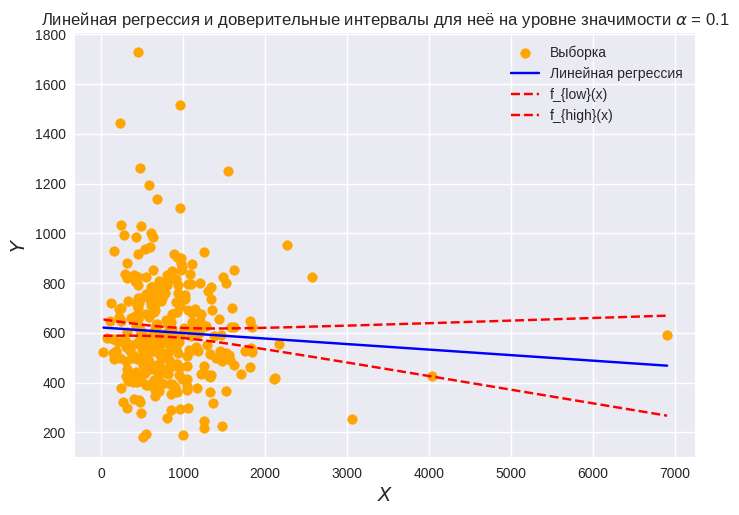

In [145]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

#### Построить график остатков $\varepsilon(x) = y - f(x)$

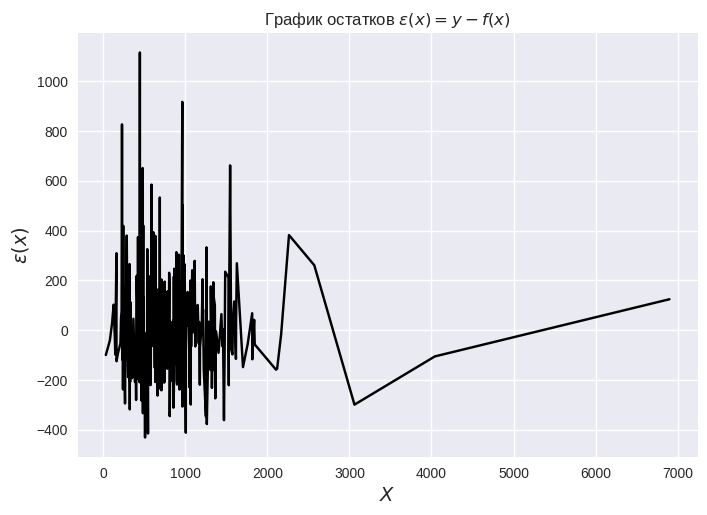

In [146]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

### 9.1.3. Проверка значимости линейной регрессионной модели

Статистическая гипотеза $H_0:\ \beta_1 = 0; \quad H':\ \beta_1 \neq 0$.

#### Указать формулы расчёта показателей, используемых при проверке значимости линейной регрессионной модели

|                                                                                  | Выражение                                                       | Пояснение использованных обозначений                |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------- | --------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y ост} / (n - 2)}$ | $n$ - объём выборки $(x_1, y_1), \dots, (x_n, y_n)$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(1,\ n-2)$                                                    |                                                     |
| Формулы расчёта критической точки                                                | $F_{1 - \alpha,\ 1,\ n-2}$                                      | Правосторонняя критическая область.                 |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                              |                                                     |

#### Проверить значимость линейной регрессионной модели

`r_value` - выборочное значение коэффициента корреляции Пирсона $\tilde \rho^2_{XY}$. При линейной регрессии квадрат этого значения равен коэффициенту детерминации: $\tilde{\rho}_{XY}^2 = \tilde{R}^2$.

Статистику критерия же можно переписать как $Z = \dfrac{\tilde R^2}{(1 - \tilde R^2) / (n - 2)}$. Значение `p_value` у нас уже есть из функции `stats.linregress`.

In [147]:
alphas = [0.01, 0.05, 0.1]

z = r_value**2 * (n - 2) / (1 - r_value**2)

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = 0$, $H_1$: $\\beta_1 \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = 0$, $H_1$: $\beta_1 \neq 0$

$z_{выб} =$ 1.24

$p =$ 0.27

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

| Уровень значимости | Выборочное значение статистики критерия | $p$-value | Статистическое решение | Вывод            |
| ------------------ | --------------------------------------- | --------- | ---------------------- | ---------------- |
| 0.01               | 1.24                                   | 0.27      | $H_0$ принимается      | $\beta_1 = 0$ |
| 0.05               | 1.24                                   | 0.27      | $H_0$ принимается      | $\beta_1 = 0$ |
| 0.1                | 1.24                                   | 0.27      | $H_0$ принимается      | $\beta_1 = 0$ |

<a id="92"></a>

## 9.2 Линейная регрессионная модель общего вида

### Условие

Факторный признак $x$ - `C12` (Dietary retinol consumed (mcg per day))

Результативный признак $y$ - `C14` (Plasma Retinol (ng/ml))

Уравнение регрессии (квадратичное по $x$) - $f(x) = \beta_0 + \beta_1x + \beta_2x^2$

### Определения

In [148]:
X, Y = data("9.2")
X.head(), Y.head()

(0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64,
 0    915
 1    727
 2    721
 3    615
 4    799
 Name: C14, dtype: int64)

In [149]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

315 315


In [150]:
k = 3

### 9.2.1. Точечные оценки линейной регрессионной модели

#### Рассчитать точечные оценки параметров линейной регрессионной модели

Построим `design matrix` = $\begin{pmatrix}1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2\end{pmatrix}$.

In [151]:
X.head()

0     890
1     451
2     660
3     864
4    1209
Name: C12, dtype: int64

In [152]:
X.values.reshape(-1, 1)[:5]

array([[ 890],
       [ 451],
       [ 660],
       [ 864],
       [1209]])

In [153]:
design_matrix = np.column_stack([X**i for i in range(3)])
design_matrix[:5]

array([[      1,     890,  792100],
       [      1,     451,  203401],
       [      1,     660,  435600],
       [      1,     864,  746496],
       [      1,    1209, 1461681]])

Построим МНК-оценки параметров $\beta_0, \beta_1, \beta_2$ по формуле $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - `design matrix`, $y_{\downarrow}$ - вектор значений результативного признака.

In [154]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ 631.82

$\tilde{\beta_1} =$ -0.04

$\tilde{\beta_2} =$ 0.00

| Параметр                                                                                                       | Формула расчета                                                                                                                                               | Значение                                                |
| -------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| $\tilde \beta_{\downarrow} = \begin{pmatrix} \tilde \beta_0 \\ \tilde \beta_1 \\ \tilde \beta_2 \end{pmatrix}$ | $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - регрессионная матрица, $y_{\downarrow}$ - вектор значений результативного признака. | $\begin{pmatrix} 631.82 \\ -0.04 \\ 0.00 \end{pmatrix}$ |


#### Рассчитать точечную оценку уравнения регрессии

$\tilde f(x) = \tilde \beta_0 + \tilde \beta_1x + \tilde \beta_2x^2 = 631.82 - 0.04x + 0.00x^2$

In [155]:
predictions = model.predict(design_matrix)

#### Рассчитать показатели вариации, используемые в регрессионном анализе

In [156]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 212.05

$\tilde{D}_{Y ост} =$ 43286.73

$\tilde{D}_{Y общ} =$ 43498.79

$\tilde{D}_{Y \mid X, несмещ} =$ 33398.60

$\tilde{D}_{Y ост, несмещ} =$ 43702.95

$\tilde{D}_{Y общ, несмещ} =$ 43637.32

| Источник вариации   | Показатель вариации                    | Число степеней свободы | Несмещённая оценка                                     |
| ------------------- | -------------------------------------- | ---------------------- | ------------------------------------------------------ |
| Регрессия           | $\tilde{D}_{Y \mid X} = 212.05$       | $k - 1 = 2$            | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X} = 33398.60$     |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 43286.73$  | $n - k = 312$          | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}} = 43702.95$  |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 43498.79$ | $n - 1 = 314$          | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}} = 43637.32$ |

$k$ — число оцениваемых параметров функции регрессии.

#### Проверить правило сложения дисперсий

In [157]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X}} + \\tilde{{D}}_{{Y ост}} = {D_YX + D_resY:.2f}$",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X} =$ 212.05

$\tilde{D}_{Y ост} =$ 43286.73

$\tilde{D}_{Y общ} =$ 43498.79

$\tilde{D}_{Y \mid X} + \tilde{D}_{Y ост} = 43498.79$

True


#### Рассчитать показатели тесноты связи между факторным и результативным признаками

In [158]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {m.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.00

$\tilde{R} =$ 0.07

| Показатель               | Формула расчета                                                                                  | Значение |
| ------------------------ | ------------------------------------------------------------------------------------------------ | -------- |
| Коэффициент детерминации | $\tilde{R^2} = \dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}$                          | 0.00     |
| Корреляционное отношение | $\tilde R = \sqrt{\tilde{R^2}} = \sqrt{\dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}}$ | 0.07     |


#### Охарактеризовать тип связи между факторным и результативным признаками, определяемой рассчитанной линейной регрессией.

Наблюдается очень слабая корреляционная связь между факторным признаком `C12` и результативным признаком `C14`.

### 9.2.2. Интервальные оценки линейной регрессионной модели

#### Привести формулы расчёта доверительных интервалов для значений регрессии $f(x)$

| Границы доверительного интервала | Формула расчета                                                                                                                                                                |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Нижняя граница $f_{low}(x)$      | $\tilde f(x) - t_{1 - \frac{\alpha}{2},\ (n-k)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\overrightarrow \varphi(x)\left(F^TF\right)^{-1} \varphi_{\downarrow}(x)}$ |
| Верхняя граница $f_{high}(x)$    | $\tilde f(x) + t_{1 - \frac{\alpha}{2},\ (n-k)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\overrightarrow \varphi(x)\left(F^TF\right)^{-1} \varphi_{\downarrow}(x)}$ |

#### Построить диаграмму рассеяния признаков $x$ и $y$. Нанести на диаграмму функцию регрессии $f(x)$, а также нижние и верхние границы линии регрессии $f_{low}(x)$ и $f_{high}(x)$ на уровне значимости $\alpha = 0.1$.

In [159]:
alpha = 0.1

In [160]:
table = pd.DataFrame(
    np.column_stack(
        [X, Y, predictions, model.get_prediction(design_matrix).conf_int(alpha=alpha)]
    ),
    columns=[
        "x",
        "y",
        "f(x)",
        "f_low(x)",
        "f_high(x)",
    ],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
250,30.0,521.0,630.624645,585.832823,675.416467
242,79.0,578.0,628.684620,586.589105,670.780135
263,106.0,647.0,627.624142,586.975629,668.272656
297,125.0,721.0,626.881507,587.234019,666.528996
214,141.0,573.0,626.258454,587.442542,665.074366
...,...,...,...,...,...
122,2263.0,953.0,562.452869,505.161721,619.744017
7,2571.0,825.0,556.297595,491.180275,621.414914
256,3061.0,254.0,548.127757,470.460204,625.795310
93,4041.0,426.0,537.766245,428.277477,647.255014


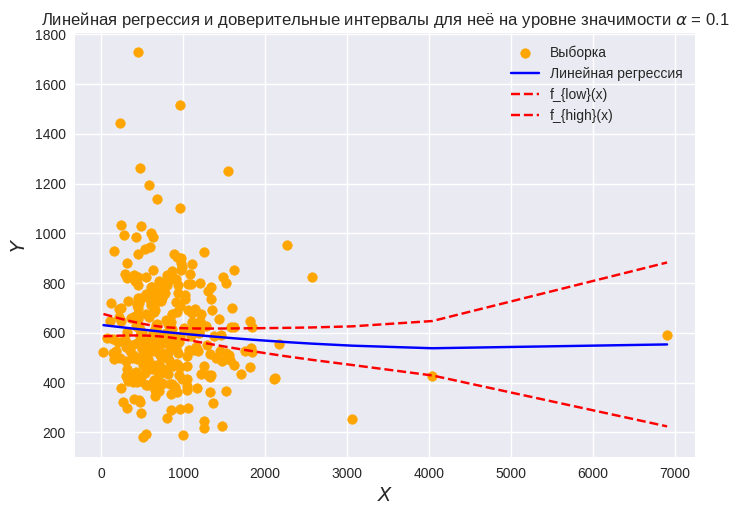

In [161]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

#### Построить график остатков $\varepsilon(x) = y - f(x)$

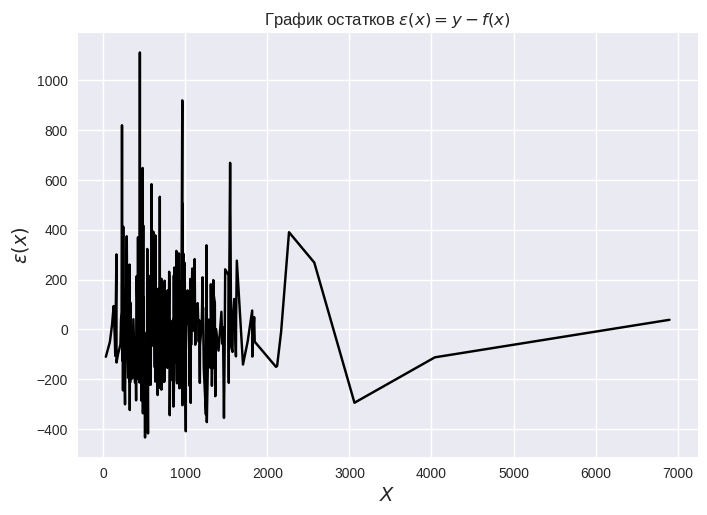

In [162]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

### 9.2.3. Проверка значимости линейной регрессионной модели

Статистическая гипотеза $H_0:\ \beta_1 = \beta_2 = 0; \quad H':\ \beta_1^2 + \beta_2^2 > 0$.

#### Указать формулы расчёта показателей, используемых при проверке значимости линейной регрессионной модели

|                                                                                  | Выражение                                                               | Пояснение использованных обозначений                |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------- | --------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\tilde{D}_{Y \mid X}^{несмещ}}{\tilde{D}_{Y ост}^{несмещ}}$ | $n$ - объём выборки $(x_1, y_1), \dots, (x_n, y_n)$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(k-1,\ n-2)$                                                          |                                                     |
| Формулы расчёта критической точки                                                | $F_{1 - \alpha,\ k-1,\ n-2}$                                            | Правосторонняя критическая область.                 |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                      |                                                     |

#### Проверить значимость линейной регрессионной модели

In [163]:
alphas = [0.01, 0.05, 0.1]

z = model.fvalue
p_value = model.f_pvalue

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = \\beta_2 = 0$, $H_1$: $\\beta_1^2 + \\beta_2^2 > 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = \beta_2 = 0$, $H_1$: $\beta_1^2 + \beta_2^2 > 0$

$z_{выб} =$ 0.76

$p =$ 0.47

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

| Уровень значимости | Выборочное значение статистики критерия | $p$-value | Статистическое решение | Вывод                       |
| ------------------ | --------------------------------------- | --------- | ---------------------- | --------------------------- |
| 0.01               | 0.76                                    | 0.47      | $H_0$ принимается      | $\beta_1^2 + \beta_2^2 = 0$ |
| 0.05               | 0.76                                    | 0.47      | $H_0$ принимается      | $\beta_1^2 + \beta_2^2 = 0$ |
| 0.1                | 0.76                                    | 0.47      | $H_0$ принимается      | $\beta_1^2 + \beta_2^2 = 0$ |

<a id="93"></a>

## 9.3 Множественная линейная регрессионная модель

### Условие

Факторный признак 1 $x_1$ - `C12` ( 	Dietary retinol consumed (mcg per day))

Факторный признак 2 $x_2$ - `C4` (Quetelet (weight/(height^2)))

Результативный признак $y$ - `C14` ( 	Plasma Retinol (ng/ml))

Уравнение регрессии - $f(x) = \beta_0 + \beta_1x_1 + \beta_2x_2$

### Определения

In [164]:
X1, X2, Y = data("9.3")
X1.head(), X2.head(), Y.head()

(0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64,
 0    21.48380
 1    23.87631
 2    20.01080
 3    25.14062
 4    20.98504
 Name: C4, dtype: float64,
 0    915
 1    727
 2    721
 3    615
 4    799
 Name: C14, dtype: int64)

In [165]:
print(n1 := len(X1), n2 := len(X2), n3 := len(Y))

if n1 == n2 == n3:
    n = n1

315 315 315


In [166]:
k = 3

### Рассчитать точечные оценки параметров множественной линейной регрессионной модели

В данном случае $\varphi_0(x) = 1$, $\varphi_1(x) = x_1$, $\varphi_2(x) = x_2$.

`design matrix` точно такая же: $\begin{pmatrix}1 & x_{11} & x_{12} \\ 1 & x_{21} & x_{22} \\ \vdots & \vdots & \vdots \\ 1 & x_{n1} & x_{n2}\end{pmatrix}$.

In [167]:
vector_X = np.column_stack([X1, X2])
vector_X[:5]

array([[ 890.     ,   21.4838 ],
       [ 451.     ,   23.87631],
       [ 660.     ,   20.0108 ],
       [ 864.     ,   25.14062],
       [1209.     ,   20.98504]])

In [168]:
design_matrix = sm.add_constant(vector_X)
design_matrix[:5]

array([[1.000000e+00, 8.900000e+02, 2.148380e+01],
       [1.000000e+00, 4.510000e+02, 2.387631e+01],
       [1.000000e+00, 6.600000e+02, 2.001080e+01],
       [1.000000e+00, 8.640000e+02, 2.514062e+01],
       [1.000000e+00, 1.209000e+03, 2.098504e+01]])

Построим МНК-оценки параметров $\beta_0, \beta_1, \beta_2$ по формуле $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - `design matrix`, $y_{\downarrow}$ - вектор значений результативного признака.

In [169]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ 607.69

$\tilde{\beta_1} =$ -0.02

$\tilde{\beta_2} =$ 0.53

| Параметр                                                                                                       | Формула расчета                                                                                                                                               | Значение                                                |
| -------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| $\tilde \beta_{\downarrow} = \begin{pmatrix} \tilde \beta_0 \\ \tilde \beta_1 \\ \tilde \beta_2 \end{pmatrix}$ | $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - регрессионная матрица, $y_{\downarrow}$ - вектор значений результативного признака. | $\begin{pmatrix} 607.69 \\ -0.02 \\ 0.53 \end{pmatrix}$ |


### Записать точечную оценку уравнения регрессии

$\tilde f(x) = \tilde \beta_0 + \tilde \beta_1x_1 + \tilde \beta_2x_2 = 607.69 - 0.02x_1 - 0.53x_2$

In [170]:
predictions = model.predict(design_matrix)

### Рассчитать показатели вариации, используемые в регрессионном анализе

In [171]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X_1, X_2} =$ 181.56

$\tilde{D}_{Y ост} =$ 43317.23

$\tilde{D}_{Y общ} =$ 43498.79

$\tilde{D}_{Y \mid X_1, X_2, несмещ} =$ 28595.84

$\tilde{D}_{Y ост, несмещ} =$ 43733.74

$\tilde{D}_{Y общ, несмещ} =$ 43637.32

| Источник вариации   | Показатель вариации                     | Число степеней свободы | Несмещённая оценка                                        |
| ------------------- | --------------------------------------- | ---------------------- | --------------------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X_1, X_2} = 181.56$ | $k - 1 = 2$            | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X_1, X_2} = 28595.84$ |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 43317.23$   | $n - k = 312$          | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}} = 43733.74$     |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 28595.84$  | $n - 1 = 314$          | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}} = 43637.32$    |

$k$ — число оцениваемых параметров функции регрессии.

### Проверить правило сложения дисперсий

In [172]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} + \\tilde{{D}}_{{Y ост}} = {D_YX + D_resY:.2f}$",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X_1, X_2} =$ 181.56

$\tilde{D}_{Y ост} =$ 43317.23

$\tilde{D}_{Y общ} =$ 43498.79

$\tilde{D}_{Y \mid X_1, X_2} + \tilde{D}_{Y ост} = 43498.79$

True


### Рассчитать показатели тесноты связи между факторными и результативным признаками

In [173]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {m.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.00

$\tilde{R} =$ 0.06

| Показатель               | Формула расчета                                                                                         | Значение |
| ------------------------ | ------------------------------------------------------------------------------------------------------- | -------- |
| Коэффициент детерминации | $\tilde{R^2} = \dfrac{\tilde{D}_{Y \mid X_1, X_2}}{\tilde{D}_{Y \text{ общ}}}$                          | 0.00     |
| Корреляционное отношение | $\tilde R = \sqrt{\tilde{R^2}} = \sqrt{\dfrac{\tilde{D}_{Y \mid X_1, X_2}}{\tilde{D}_{Y \text{ общ}}}}$ | 0.06     |


### Охарактеризовать тип связи между факторными и результативным признаками, определяемой рассчитанной линейной регрессией

Наблюдается **очень слабая (практически отсутствующая) корреляционная связь** между факторными признаками `C12` и `C4` и результативным признаком `C14` (коэффициент детерминации близок к нулю).


<a id="94"></a>

## 9.4 Выводы

### Сводная таблица показателей вариации для различных регрессионных моделей

| Источник вариации   | Простейшая линейная модель             | Линейная модель с квадратичным членом  | Множественная линейная модель           |
| ------------------- | -------------------------------------- | -------------------------------------- | --------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X} = 171.56$       | $\tilde{D}_{Y \mid X} = 212.05$       | $\tilde{D}_{Y \mid X_1, X_2} = 181.56$ |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 43327.22$  | $\tilde{D}_{Y\text{ ост}} = 43286.73$  | $\tilde{D}_{Y\text{ ост}} = 43317.23$   |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 43498.79$ | $\tilde{D}_{Y \text{ общ}} = 43498.79$ | $\tilde{D}_{Y \text{ общ}} = 43498.79$  |

### Сводная таблица свойств различных регрессионных моделей

| Свойство              | Простейшая линейная модель | Линейная модель с квадратичным членом | Множественная линейная модель |
| --------------------- | -------------------------- | ------------------------------------- | ----------------------------- |
| Точность              | Неточная                   | Неточная                              | Неточная                      |
| Значимость            | Значимая                   | Значимая                              | Значимая                      |
| Адекватность          | Неадекватная               | Неадекватная                          | Неадекватная                  |
| Степень тесноты связи | Слабая               | Очень слабая                          | Очень Слабая                        |


### Вывод (в терминах предметной области)

В результате проведённого в п.9 регрессионного анализа установлено, что результативный признак `C13` имеет слабую статистическую связь с факторным признаком `C11` (доля объяснённой вариации мала, \(R^2 \approx 0.05\)). Учет квадратичного члена в модели практически не улучшает качество описания (показатели вариации совпадают с простой линейной моделью). При одновременном учёте двух факторных признаков `C11` и `C4` качество модели повышается (\(R^2 \approx 0.10\)), однако связь остаётся слабой, а основная часть вариации `C13` объясняется неучтёнными факторами.
